# Preperation

## Importing the Library and Data we need

In [147]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()
sb.set() 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

!pip install kmodes
from kmodes.kmodes import KModes


from pprint import pprint
import itertools
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

### Importing the dataset we will be using

In [148]:
dataset = pd.read_csv('mushrooms.csv')

## Data cleaning

In [149]:
#cap-shape
dataset['cap-shape']=dataset['cap-shape'].replace(['b'],['bell'])
dataset['cap-shape']=dataset['cap-shape'].replace(['c'],['conical'])
dataset['cap-shape']=dataset['cap-shape'].replace(['x'],['convex'])
dataset['cap-shape']=dataset['cap-shape'].replace(['f'],['flat'])
dataset['cap-shape']=dataset['cap-shape'].replace(['k'],['knobbed'])
dataset['cap-shape']=dataset['cap-shape'].replace(['s'],['sunken'])

In [150]:
#cap-surface
dataset['cap-surface']=dataset['cap-surface'].replace(['f'],['fibrous'])
dataset['cap-surface']=dataset['cap-surface'].replace(['g'],['grooves'])
dataset['cap-surface']=dataset['cap-surface'].replace(['y'],['scaly'])
dataset['cap-surface']=dataset['cap-surface'].replace(['s'],['smooth'])

In [151]:
#cap-color
dataset['cap-color']=dataset['cap-color'].replace(['n'],['brown'])
dataset['cap-color']=dataset['cap-color'].replace(['b'],['buff'])
dataset['cap-color']=dataset['cap-color'].replace(['c'],['cinnamon'])
dataset['cap-color']=dataset['cap-color'].replace(['g'],['grey'])
dataset['cap-color']=dataset['cap-color'].replace(['r'],['green'])
dataset['cap-color']=dataset['cap-color'].replace(['p'],['pink'])
dataset['cap-color']=dataset['cap-color'].replace(['u'],['purple'])
dataset['cap-color']=dataset['cap-color'].replace(['e'],['red'])
dataset['cap-color']=dataset['cap-color'].replace(['w'],['white'])
dataset['cap-color']=dataset['cap-color'].replace(['y'],['yellow'])

In [152]:
#bruises
dataset['bruises']=dataset['bruises'].replace(['t'],['have bruises'])
dataset['bruises']=dataset['bruises'].replace(['f'],['no bruises'])

In [153]:
#odor
dataset['odor']=dataset['odor'].replace(['a'],['almond'])
dataset['odor']=dataset['odor'].replace(['l'],['anise'])
dataset['odor']=dataset['odor'].replace(['c'],['creosote'])
dataset['odor']=dataset['odor'].replace(['y'],['fishy'])
dataset['odor']=dataset['odor'].replace(['f'],['foul'])
dataset['odor']=dataset['odor'].replace(['m'],['musty'])
dataset['odor']=dataset['odor'].replace(['n'],['none'])
dataset['odor']=dataset['odor'].replace(['p'],['pungent'])
dataset['odor']=dataset['odor'].replace(['s'],['spicy'])

In [154]:
#gill-attachment
dataset['gill-attachment']=dataset['gill-attachment'].replace(['a'],['attached'])
dataset['gill-attachment']=dataset['gill-attachment'].replace(['d'],['descending'])
dataset['gill-attachment']=dataset['gill-attachment'].replace(['f'],['free'])
dataset['gill-attachment']=dataset['gill-attachment'].replace(['n'],['notched'])

In [155]:
#gill-spacing
dataset['gill-spacing']=dataset['gill-spacing'].replace(['c'],['close'])
dataset['gill-spacing']=dataset['gill-spacing'].replace(['w'],['crowded'])
dataset['gill-spacing']=dataset['gill-spacing'].replace(['d'],['distant'])

In [156]:
#gill-size
dataset['gill-size']=dataset['gill-size'].replace(['n'],['narrow'])
dataset['gill-size']=dataset['gill-size'].replace(['b'],['broad'])

In [157]:
#gill-color
dataset['gill-color']=dataset['gill-color'].replace(['k'],['black'])
dataset['gill-color']=dataset['gill-color'].replace(['n'],['brown'])
dataset['gill-color']=dataset['gill-color'].replace(['b'],['buff'])
dataset['gill-color']=dataset['gill-color'].replace(['h'],['chocolate'])
dataset['gill-color']=dataset['gill-color'].replace(['g'],['grey'])
dataset['gill-color']=dataset['gill-color'].replace(['r'],['green'])
dataset['gill-color']=dataset['gill-color'].replace(['o'],['orange'])
dataset['gill-color']=dataset['gill-color'].replace(['p'],['pink'])
dataset['gill-color']=dataset['gill-color'].replace(['u'],['purple'])
dataset['gill-color']=dataset['gill-color'].replace(['e'],['red'])
dataset['gill-color']=dataset['gill-color'].replace(['w'],['white'])
dataset['gill-color']=dataset['gill-color'].replace(['y'],['yellow'])

In [158]:
#stalk-shape
dataset['stalk-shape']=dataset['stalk-shape'].replace(['e'],['enlarging'])
dataset['stalk-shape']=dataset['stalk-shape'].replace(['t'],['tapering'])

In [159]:
#stalk-root
dataset['stalk-root']=dataset['stalk-root'].replace(['b'],['bulbous'])
dataset['stalk-root']=dataset['stalk-root'].replace(['c'],['club'])
dataset['stalk-root']=dataset['stalk-root'].replace(['u'],['cup'])
dataset['stalk-root']=dataset['stalk-root'].replace(['e'],['equal'])
dataset['stalk-root']=dataset['stalk-root'].replace(['z'],['rhizomorphs'])
dataset['stalk-root']=dataset['stalk-root'].replace(['r'],['rooted'])
dataset['stalk-root']=dataset['stalk-root'].replace(['?'],['missing'])

In [160]:
#stalk-surface-below-ring
dataset['stalk-surface-below-ring']=dataset['stalk-surface-below-ring'].replace(['f'],['fibrous'])
dataset['stalk-surface-below-ring']=dataset['stalk-surface-below-ring'].replace(['y'],['scaly'])
dataset['stalk-surface-below-ring']=dataset['stalk-surface-below-ring'].replace(['k'],['silky'])
dataset['stalk-surface-below-ring']=dataset['stalk-surface-below-ring'].replace(['s'],['smooth'])

In [161]:
#stalk-surface-above-ring
dataset['stalk-surface-above-ring']=dataset['stalk-surface-above-ring'].replace(['f'],['fibrous'])
dataset['stalk-surface-above-ring']=dataset['stalk-surface-above-ring'].replace(['y'],['scaly'])
dataset['stalk-surface-above-ring']=dataset['stalk-surface-above-ring'].replace(['k'],['silky'])
dataset['stalk-surface-above-ring']=dataset['stalk-surface-above-ring'].replace(['s'],['smooth'])

In [162]:
#stalk-color-below-ring
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['n'],['brown'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['b'],['buff'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['c'],['cinnamon'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['g'],['grey'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['o'],['orange'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['p'],['pink'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['e'],['red'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['w'],['white'])
dataset['stalk-color-below-ring']=dataset['stalk-color-below-ring'].replace(['y'],['yellow'])

In [163]:
#stalk-color-above-ring
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['n'],['brown'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['b'],['buff'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['c'],['cinnamon'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['g'],['grey'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['o'],['orange'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['p'],['pink'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['e'],['red'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['w'],['white'])
dataset['stalk-color-above-ring']=dataset['stalk-color-above-ring'].replace(['y'],['yellow'])

In [164]:
#veil-type
dataset['veil-type']=dataset['veil-type'].replace(['p'],['partial'])
dataset['veil-type']=dataset['veil-type'].replace(['u'],['universal'])

In [165]:
#veil-color
dataset['veil-color']=dataset['veil-color'].replace(['n'],['brown'])
dataset['veil-color']=dataset['veil-color'].replace(['o'],['orange'])
dataset['veil-color']=dataset['veil-color'].replace(['w'],['white'])
dataset['veil-color']=dataset['veil-color'].replace(['y'],['yellow'])

In [166]:
#ring-number
dataset['ring-number']=dataset['ring-number'].replace(['n'],['null'])
dataset['ring-number']=dataset['ring-number'].replace(['o'],['one'])
dataset['ring-number']=dataset['ring-number'].replace(['t'],['two'])

In [167]:
#ring-type
dataset['ring-type']=dataset['ring-type'].replace(['c'],['cobwebby'])
dataset['ring-type']=dataset['ring-type'].replace(['e'],['evanescent'])
dataset['ring-type']=dataset['ring-type'].replace(['f'],['flaring'])
dataset['ring-type']=dataset['ring-type'].replace(['l'],['large'])
dataset['ring-type']=dataset['ring-type'].replace(['n'],['none'])
dataset['ring-type']=dataset['ring-type'].replace(['p'],['pendant'])
dataset['ring-type']=dataset['ring-type'].replace(['s'],['sheathing'])
dataset['ring-type']=dataset['ring-type'].replace(['z'],['zone'])

In [168]:
#spore-print-color
dataset['spore-print-color']=dataset['spore-print-color'].replace(['k'],['black'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['n'],['brown'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['b'],['buff'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['h'],['chocolate'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['r'],['green'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['o'],['orange'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['u'],['purple'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['w'],['white'])
dataset['spore-print-color']=dataset['spore-print-color'].replace(['y'],['yellow'])

In [169]:
#population
dataset['population']=dataset['population'].replace(['a'],['abundant'])
dataset['population']=dataset['population'].replace(['c'],['clustering'])
dataset['population']=dataset['population'].replace(['n'],['numerous'])
dataset['population']=dataset['population'].replace(['s'],['scattered'])
dataset['population']=dataset['population'].replace(['v'],['several'])
dataset['population']=dataset['population'].replace(['y'],['solitary'])

In [170]:
#habitat
dataset['habitat']=dataset['habitat'].replace(['g'],['grasses'])
dataset['habitat']=dataset['habitat'].replace(['l'],['leaves'])
dataset['habitat']=dataset['habitat'].replace(['m'],['meadows'])
dataset['habitat']=dataset['habitat'].replace(['p'],['paths'])
dataset['habitat']=dataset['habitat'].replace(['u'],['urban'])
dataset['habitat']=dataset['habitat'].replace(['w'],['waste'])
dataset['habitat']=dataset['habitat'].replace(['d'],['woods'])

In [171]:
#Filtering into poisonous and non-poisonous
p_mushrooms = (dataset.groupby('class').get_group('p')).reset_index()
e_mushrooms = (dataset.groupby('class').get_group('e')).reset_index()

# Data Analysis

## Analysis via proportion of poisonous mushrooms

In [172]:
#Counting the number of instances for each variable. -filtered into poisonous and non-poisonous mushrooms
p_cap_shape_count = p_mushrooms['cap-shape'].value_counts(dropna=False)
p_cap_color_count = p_mushrooms['cap-color'].value_counts(dropna=False)
p_cap_surface_count = p_mushrooms['cap-surface'].value_counts(dropna=False)
p_bruises_count = p_mushrooms['bruises'].value_counts(dropna=False)
p_odor_count = p_mushrooms['odor'].value_counts(dropna=False)
p_gill_attachment_count = p_mushrooms['gill-attachment'].value_counts(dropna=False)
p_gill_spacing_count = p_mushrooms['gill-spacing'].value_counts(dropna=False)
p_gill_size_count = p_mushrooms['gill-size'].value_counts(dropna=False)
p_gill_color_count = p_mushrooms['gill-color'].value_counts(dropna=False)
p_stalk_shape_count = p_mushrooms['stalk-shape'].value_counts(dropna=False)
p_stalk_root_count = p_mushrooms['stalk-root'].value_counts(dropna=False)
p_stalk_surface_above_ring_count = p_mushrooms['stalk-surface-above-ring'].value_counts(dropna=False)
p_stalk_surface_below_ring_count = p_mushrooms['stalk-surface-below-ring'].value_counts(dropna=False)
p_stalk_color_below_ring_count = p_mushrooms['stalk-color-below-ring'].value_counts(dropna=False)
p_stalk_color_above_ring_count = p_mushrooms['stalk-color-above-ring'].value_counts(dropna=False)
p_veil_type_count = p_mushrooms['veil-type'].value_counts(dropna=False)
p_veil_color_count = p_mushrooms['veil-color'].value_counts(dropna=False)
p_ring_number_count = p_mushrooms['ring-number'].value_counts(dropna=False)
p_ring_type_count = p_mushrooms['ring-type'].value_counts(dropna=False)
p_spore_print_color_count = p_mushrooms['spore-print-color'].value_counts(dropna=False)
p_population_count = p_mushrooms['population'].value_counts(dropna=False)
p_habitat_count = p_mushrooms['habitat'].value_counts(dropna=False)

e_cap_shape_count = e_mushrooms['cap-shape'].value_counts(dropna=False)
e_cap_color_count = e_mushrooms['cap-color'].value_counts(dropna=False)
e_cap_surface_count = e_mushrooms['cap-surface'].value_counts(dropna=False)
e_bruises_count = e_mushrooms['bruises'].value_counts(dropna=False)
e_odor_count = e_mushrooms['odor'].value_counts(dropna=False)
e_gill_attachment_count = e_mushrooms['gill-attachment'].value_counts(dropna=False)
e_gill_spacing_count = e_mushrooms['gill-spacing'].value_counts(dropna=False)
e_gill_size_count = e_mushrooms['gill-size'].value_counts(dropna=False)
e_gill_color_count = e_mushrooms['gill-color'].value_counts(dropna=False)
e_stalk_shape_count = e_mushrooms['stalk-shape'].value_counts(dropna=False)
e_stalk_root_count = e_mushrooms['stalk-root'].value_counts(dropna=False)
e_stalk_surface_above_ring_count = e_mushrooms['stalk-surface-above-ring'].value_counts(dropna=False)
e_stalk_surface_below_ring_count = e_mushrooms['stalk-surface-below-ring'].value_counts(dropna=False)
e_stalk_color_below_ring_count = e_mushrooms['stalk-color-below-ring'].value_counts(dropna=False)
e_stalk_color_above_ring_count = e_mushrooms['stalk-color-above-ring'].value_counts(dropna=False)
e_veil_type_count = e_mushrooms['veil-type'].value_counts(dropna=False)
e_veil_color_count = e_mushrooms['veil-color'].value_counts(dropna=False)
e_ring_number_count = e_mushrooms['ring-number'].value_counts(dropna=False)
e_ring_type_count = e_mushrooms['ring-type'].value_counts(dropna=False)
e_spore_print_color_count = e_mushrooms['spore-print-color'].value_counts(dropna=False)
e_population_count = e_mushrooms['population'].value_counts(dropna=False)
e_habitat_count = e_mushrooms['habitat'].value_counts(dropna=False)

In [173]:
#Defining the 2 functions required for calculating proportion
#calculating the proportion
def calc_proportions(combined_df, characteristic, mushroom_types):
    proportions = {}
    for mushroom_type in mushroom_types:
        proportion = combined_df.loc[mushroom_type, characteristic] / combined_df.loc[mushroom_type].sum()
        proportions[mushroom_type] = proportion
    return proportions
#printing the proportion
def print_proportions(combined_df, characteristic, mushroom_types):
    proportions = calc_proportions(combined_df, characteristic, mushroom_types)
    for mushroom_type, proportion in proportions.items():
        print(f"{mushroom_types[mushroom_type]}: {proportion:.4f}")

#### bar plot + proportion calculation for each variable

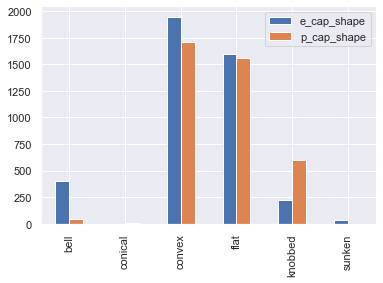

Bell: 0.1062
Conical: 1.0000
Convex: 0.4672
Flat: 0.4937
Knobbed: 0.7246
Sunken: 0.0000


In [174]:
#cap-shape
combined = pd.concat([e_cap_shape_count, p_cap_shape_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_cap_shape', 'p_cap_shape']
combined.plot(kind='bar')
plt.show()
#proportion
mushroom_types = {'bell': 'Bell', 'conical': 'Conical', 'convex': 'Convex', 'flat': 'Flat', 'knobbed': 'Knobbed', 'sunken': 'Sunken'}
print_proportions(combined, 'p_cap_shape', mushroom_types)

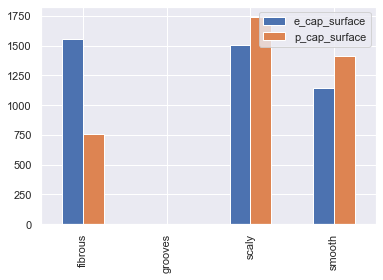

Smooth: 0.5524
Scaly: 0.5364
Fibrous: 0.3276
Grooves: 1.0000


In [175]:
#cap-surface
combined = pd.concat([e_cap_surface_count, p_cap_surface_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_cap_surface', 'p_cap_surface']
combined.plot(kind='bar')
plt.show()
#proportion
mushroom_types = {'smooth': 'Smooth', 'scaly': 'Scaly', 'fibrous': 'Fibrous', 'grooves': 'Grooves'}
print_proportions(combined, 'p_cap_surface', mushroom_types)

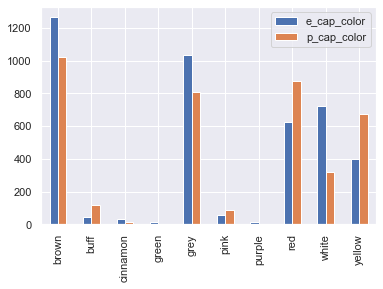

Brown: 0.4466
Yellow: 0.6269
White: 0.3077
Grey: 0.4391
Red: 0.5840
Pink: 0.6111
Buff: 0.7143
Purple: 0.0000
Cinnamon: 0.2727
Green: 0.0000


In [176]:
#cap-color
combined = pd.concat([e_cap_color_count, p_cap_color_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_cap_color', 'p_cap_color']
combined.plot(kind='bar')
plt.show()
mushroom_types = {'brown': 'Brown', 'yellow': 'Yellow', 'white': 'White', 'grey': 'Grey', 'red':'Red','pink':'Pink','buff':'Buff','purple':'Purple','cinnamon':'Cinnamon','green':'Green'}
print_proportions(combined, 'p_cap_color', mushroom_types)

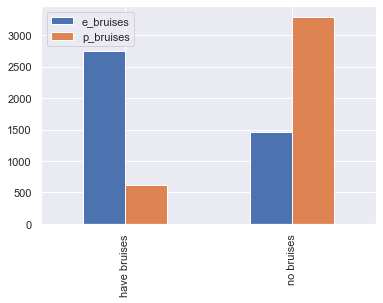

Have bruises: 0.1848
No bruises: 0.6933


In [177]:
#bruises
combined = pd.concat([e_bruises_count, p_bruises_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_bruises', 'p_bruises']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'have bruises':'Have bruises','no bruises':'No bruises'}
print_proportions(combined, 'p_bruises', mushroom_types)

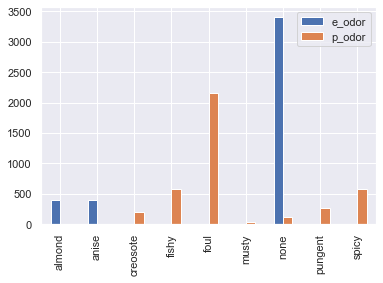

Pungent: 1.0000
Almond: 0.0000
Foul: 1.0000
Anise: 0.0000
None: 0.0340
Creosote: 1.0000
Fishy: 1.0000
Spicy: 1.0000
Musty: 1.0000


In [178]:
#odor
combined = pd.concat([e_odor_count, p_odor_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_odor', 'p_odor']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'pungent':'Pungent','almond':'Almond','foul':'Foul','anise':'Anise','none':'None','creosote':'Creosote','fishy':'Fishy','spicy':'Spicy','musty':'Musty'}
print_proportions(combined, 'p_odor', mushroom_types)

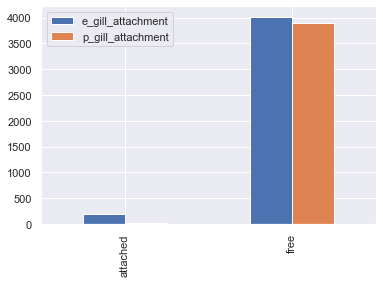

Free: 0.4925
Attached: 0.0857


In [179]:
#gill-attachment
combined = pd.concat([e_gill_attachment_count, p_gill_attachment_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_gill_attachment', 'p_gill_attachment']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'free':'Free','attached':'Attached'}
print_proportions(combined, 'p_gill_attachment', mushroom_types)

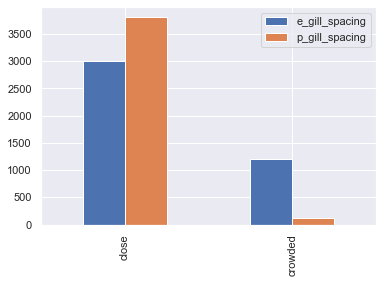

Close: 0.5584
Crowded: 0.0854


In [180]:
#gill-spacing
combined = pd.concat([e_gill_spacing_count, p_gill_spacing_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_gill_spacing', 'p_gill_spacing']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'close':'Close', 'crowded':'Crowded'}
print_proportions(combined, 'p_gill_spacing', mushroom_types)

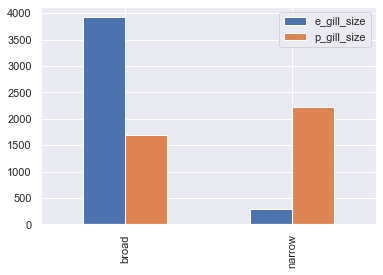

Narrow: 0.8854
Broad: 0.3015


In [181]:
#gill-size
combined = pd.concat([e_gill_size_count, p_gill_size_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_gill_size', 'p_gill_size']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'narrow':'Narrow','broad':'Broad'}
print_proportions(combined, 'p_gill_size', mushroom_types)

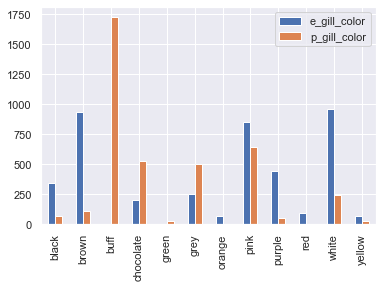

Black: 0.1569
Brown: 0.1069
Grey: 0.6702
Pink: 0.4290
White: 0.2047
Chocolate: 0.7213
Purple: 0.0976
Red: 0.0000
Buff: 1.0000
Green: 1.0000
Yellow: 0.2558
Orange: 0.0000


In [182]:
#gill-color
combined = pd.concat([e_gill_color_count, p_gill_color_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_gill_color', 'p_gill_color']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'black':'Black','brown':'Brown','grey':'Grey','pink':'Pink','white':'White','chocolate':'Chocolate','purple':'Purple','red':'Red','buff':'Buff','green':'Green','yellow':'Yellow','orange':'Orange'}
print_proportions(combined, 'p_gill_color', mushroom_types)

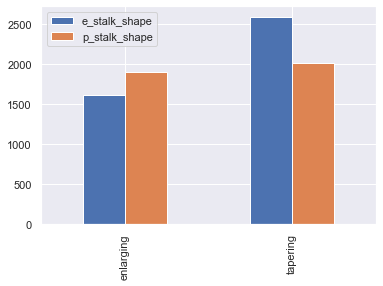

Enlarging: 0.5404
Tapering: 0.4375


In [183]:
#stalk-shape
combined = pd.concat([e_stalk_shape_count, p_stalk_shape_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_shape', 'p_stalk_shape']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'enlarging':'Enlarging','tapering':'Tapering'}
print_proportions(combined, 'p_stalk_shape', mushroom_types)

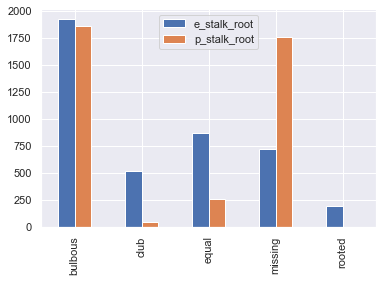

Equal: 0.2286
Club: 0.0791
Bulbous: 0.4915
Rooted: 0.0000
Missing: 0.7097


In [184]:
#stalk-root
combined = pd.concat([e_stalk_root_count, p_stalk_root_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_root', 'p_stalk_root']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'equal':'Equal','club':'Club','bulbous':'Bulbous','rooted':'Rooted','missing':'Missing'}
print_proportions(combined, 'p_stalk_root', mushroom_types)

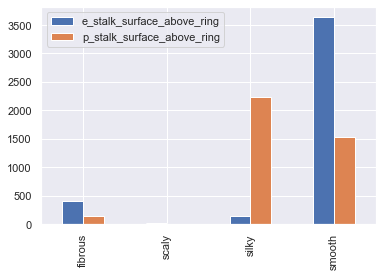

Smooth: 0.2968
Fibrous: 0.2609
Scaly: 0.3333
Silky: 0.9393


In [185]:
#stalk-surface-above-ring
combined = pd.concat([e_stalk_surface_above_ring_count, p_stalk_surface_above_ring_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_surface_above_ring', 'p_stalk_surface_above_ring']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'smooth':'Smooth','fibrous':'Fibrous','scaly':'Scaly','silky':'Silky'}
print_proportions(combined, 'p_stalk_surface_above_ring', mushroom_types)

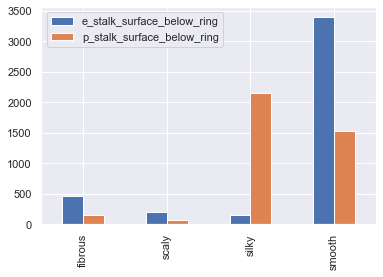

Smooth: 0.3112
Fibrous: 0.2400
Scaly: 0.2676
Silky: 0.9375


In [186]:
#stalk-surface-below-ring
combined = pd.concat([e_stalk_surface_below_ring_count, p_stalk_surface_below_ring_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_surface_below_ring', 'p_stalk_surface_below_ring']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'smooth':'Smooth','fibrous':'Fibrous','scaly':'Scaly','silky':'Silky'}
print_proportions(combined, 'p_stalk_surface_below_ring', mushroom_types)

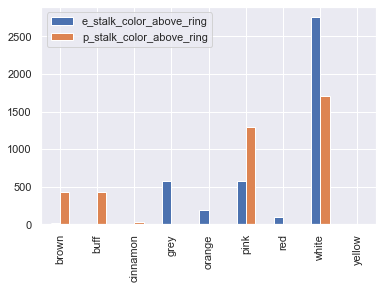

White: 0.3835
Grey: 0.0000
Pink: 0.6923
Brown: 0.9643
Buff: 1.0000
Red: 0.0000
Orange: 0.0000
Cinnamon: 1.0000
Yellow: 1.0000


In [187]:
#stalk-color-above-ring
combined = pd.concat([e_stalk_color_above_ring_count, p_stalk_color_above_ring_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_color_above_ring', 'p_stalk_color_above_ring']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'white':'White','grey':'Grey','pink':'Pink','brown':'Brown','buff':'Buff','red':'Red','orange':'Orange','cinnamon':'Cinnamon','yellow':'Yellow'}
print_proportions(combined, 'p_stalk_color_above_ring', mushroom_types)

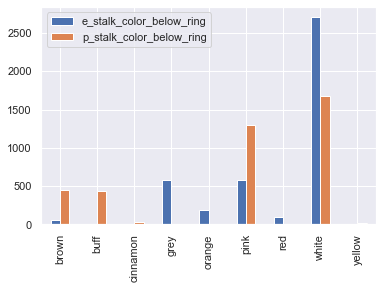

White: 0.3832
Pink: 0.6923
Grey: 0.0000
Buff: 1.0000
Brown: 0.8750
Red: 0.0000
Yellow: 1.0000
Orange: 0.0000
Cinnamon: 1.0000


In [188]:
#stalk-color-below-ring
combined = pd.concat([e_stalk_color_below_ring_count, p_stalk_color_below_ring_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_stalk_color_below_ring', 'p_stalk_color_below_ring']
combined.plot(kind='bar')
plt.show()
mushroom_types = {'white':'White','pink':'Pink','grey':'Grey','buff':'Buff','brown':'Brown','red':'Red','yellow':'Yellow','orange':'Orange','cinnamon':'Cinnamon'}
print_proportions(combined, 'p_stalk_color_below_ring', mushroom_types)

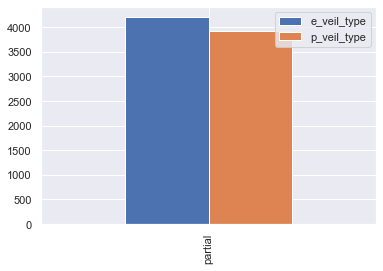

Partial: 0.4820


In [189]:
#veil-type
combined = pd.concat([e_veil_type_count, p_veil_type_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_veil_type', 'p_veil_type']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'partial':'Partial'}
print_proportions(combined, 'p_veil_type', mushroom_types)

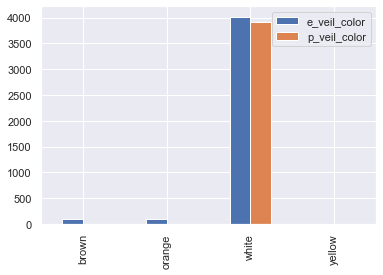

White: 0.4932
Brown: 0.0000
Orange: 0.0000
Yellow: 1.0000


In [190]:
#veil-color
combined = pd.concat([e_veil_color_count, p_veil_color_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_veil_color', 'p_veil_color']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'white':'White','brown':'Brown','orange':'Orange','yellow':'Yellow'}
print_proportions(combined, 'p_veil_color', mushroom_types)

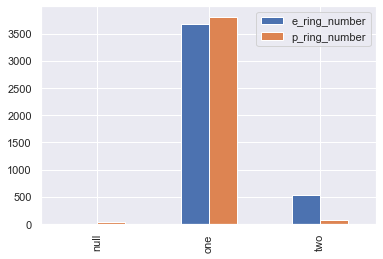

One: 0.5085
Two: 0.1200
Null: 1.0000


In [191]:
#ring-number
combined = pd.concat([e_ring_number_count, p_ring_number_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_ring_number', 'p_ring_number']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'one':'One','two':'Two','null':'Null'}
print_proportions(combined, 'p_ring_number', mushroom_types)

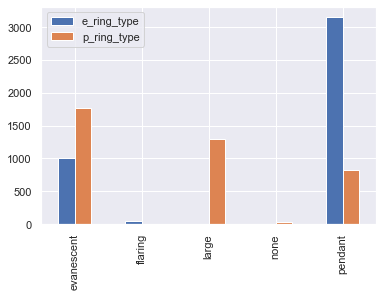

Pendant: 0.2056
Evanescent: 0.6369
Large: 1.0000
Flaring: 0.0000
None: 1.0000


In [192]:
#ring-type
combined = pd.concat([e_ring_type_count, p_ring_type_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_ring_type', 'p_ring_type']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'pendant':'Pendant','evanescent':'Evanescent','large':'Large','flaring':'Flaring','none':'None'}
print_proportions(combined, 'p_ring_type', mushroom_types)

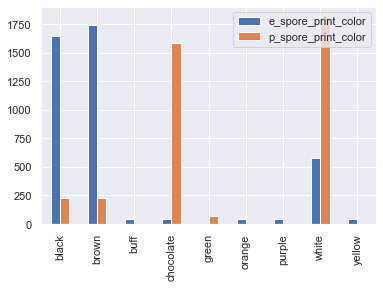

Black: 0.1197
Brown: 0.1138
Purple: 0.0000
Chocolate: 0.9706
White: 0.7588
Green: 1.0000
Orange: 0.0000
Yellow: 0.0000
Buff: 0.0000


In [193]:
#spore-print-color
combined = pd.concat([e_spore_print_color_count, p_spore_print_color_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_spore_print_color', 'p_spore_print_color']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'black':'Black','brown':'Brown','purple':'Purple','chocolate':'Chocolate','white':'White','green':'Green','orange':'Orange','yellow':'Yellow','buff':'Buff'}
print_proportions(combined, 'p_spore_print_color', mushroom_types)

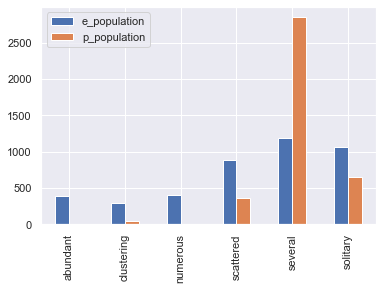

Abundant: 0.0000
Clustering: 0.1529
Numerous: 0.0000
Scattered: 0.2949
Several: 0.7050
Solitary: 0.3785


In [194]:
#population
combined = pd.concat([e_population_count, p_population_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_population', 'p_population']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'abundant':'Abundant','clustering':'Clustering','numerous':'Numerous','scattered':'Scattered','several':'Several','solitary':'Solitary'}
print_proportions(combined, 'p_population', mushroom_types)

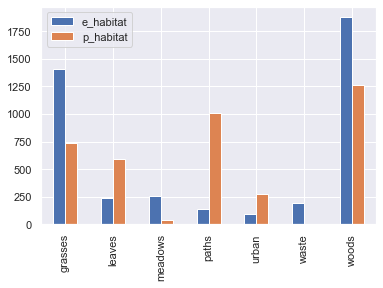

Urban: 0.7391
Grasses: 0.3445
Meadows: 0.1233
Woods: 0.4028
Paths: 0.8811
Waste: 0.0000
Leaves: 0.7115


In [195]:
#habitat
combined = pd.concat([e_habitat_count, p_habitat_count], axis=1, sort=True).fillna(0)
combined.columns = ['e_habitat', 'p_habitat']
combined.plot(kind='bar')
plt.show()

mushroom_types = {'urban':'Urban','grasses':'Grasses','meadows':'Meadows','woods':'Woods','paths':'Paths','waste':'Waste','leaves':'Leaves'}
print_proportions(combined, 'p_habitat', mushroom_types)

## Using Kmodes to cluster the data

In [196]:
# Select categorical columns to cluster on
cat_cols = dataset.columns

In [197]:
# Convert categorical variables to numerical values using one-hot encoding
one_hot = pd.get_dummies(dataset[cat_cols])

# Create KModes object
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fit the data to the model
clusters = km.fit_predict(one_hot)

# Add the clusters to the original dataset
dataset['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2887, cost: 94594.0
Run 1, iteration: 2/100, moves: 163, cost: 94534.0
Run 1, iteration: 3/100, moves: 1, cost: 94534.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4019, cost: 85534.0
Run 2, iteration: 2/100, moves: 1566, cost: 81305.0
Run 2, iteration: 3/100, moves: 305, cost: 81311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1510, cost: 84190.0
Run 3, iteration: 2/100, moves: 1045, cost: 81414.0
Run 3, iteration: 3/100, moves: 95, cost: 81376.0
Run 3, iteration: 4/100, moves: 0, cost: 81376.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1864, cost: 89712.0
Run 4, iteration: 2/100, moves: 1379, cost: 87127.0
Run 4, iteration: 3/100, moves: 754, cost: 86159.0
Run 4, iteratio

In [198]:
# Print the mode (most frequent value) of each attribute for each cluster
for cluster in set(clusters):
    print(f'Cluster {cluster} mode:')
    for column in cat_cols:
        mode = dataset[dataset['cluster'] == cluster][column].mode()[0]
        print(f'\t{column}: {mode}')

Cluster 0 mode:
	class: e
	cap-shape: convex
	cap-surface: fibrous
	cap-color: grey
	bruises: no bruises
	odor: none
	gill-attachment: free
	gill-spacing: crowded
	gill-size: broad
	gill-color: pink
	stalk-shape: tapering
	stalk-root: equal
	stalk-surface-above-ring: smooth
	stalk-surface-below-ring: smooth
	stalk-color-above-ring: white
	stalk-color-below-ring: white
	veil-type: partial
	veil-color: white
	ring-number: one
	ring-type: evanescent
	spore-print-color: black
	population: scattered
	habitat: grasses
Cluster 1 mode:
	class: p
	cap-shape: flat
	cap-surface: scaly
	cap-color: brown
	bruises: no bruises
	odor: fishy
	gill-attachment: free
	gill-spacing: close
	gill-size: narrow
	gill-color: buff
	stalk-shape: tapering
	stalk-root: missing
	stalk-surface-above-ring: smooth
	stalk-surface-below-ring: smooth
	stalk-color-above-ring: white
	stalk-color-below-ring: white
	veil-type: partial
	veil-color: white
	ring-number: one
	ring-type: evanescent
	spore-print-color: white
	popul

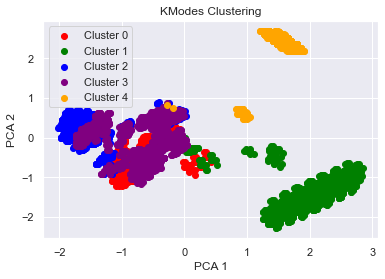

In [199]:
# Apply PCA to reduce the number of dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(one_hot)

# Define the colors for each cluster
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create a scatter plot of the first two principal components
for i in range(len(set(clusters))):
    plt.scatter(pca_result[clusters==i, 0], pca_result[clusters==i, 1], c=colors[i], label=f'Cluster {i}')

plt.title('KModes Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Machine learning

##  Random Forest Classifier

In [200]:
#mimic the dataset
mushroom = dataset
#replace poisonous to 1 and non-poisonous to 0
mushroom['class']=mushroom['class'].replace(['p'],1)
mushroom['class']=mushroom['class'].replace(['e'],0)

In [201]:
#Create training and validating set
seed = 50
y = pd.DataFrame(mushroom['class'])
X = pd.DataFrame(mushroom.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [202]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()

In [203]:
#Create a constructor to handle categorical features
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [204]:
#Train the RF classifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')

In [205]:
#pipe is a new black box created with 2 components:
#1. A constructor to handle inputs with categorical variables and transform into a correct type
#2. A classifier that receives those newly transformed inputs from the constructor.
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',

In [206]:
y_pred = pipe.predict(X_test)

In [207]:
#Evaluate the classifier
#Accuracy (fraction of correctly classified samples)
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 98.8 %


In [208]:
#Make probability predictions
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

In [209]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.999130315822389
Test ROC AUC  Score: 0.9988610192870946


### Functions required

In [210]:
#plot the ROC curve
def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train,       train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
         print('Baseline:', round(baseline[metric], 2),'\n','Test:', round(results[metric], 2),'\n','Train:', round(train_results[metric], 2))

     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)

Baseline: 1.0 
 Test: 0.98 
 Train: 0.98
Baseline: 0.47 
 Test: 1.0 
 Train: 1.0
Baseline: 0.5 
 Test: 1.0 
 Train: 1.0


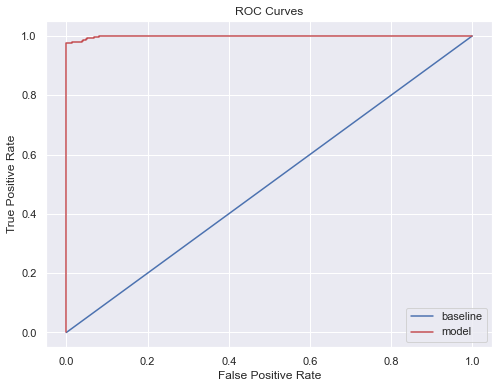

In [211]:
evaluate_model(y_pred,probs,train_predictions,train_probs)

C:\Users\eskim\AppData\Local\Temp\ipykernel_1768\2233886449.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


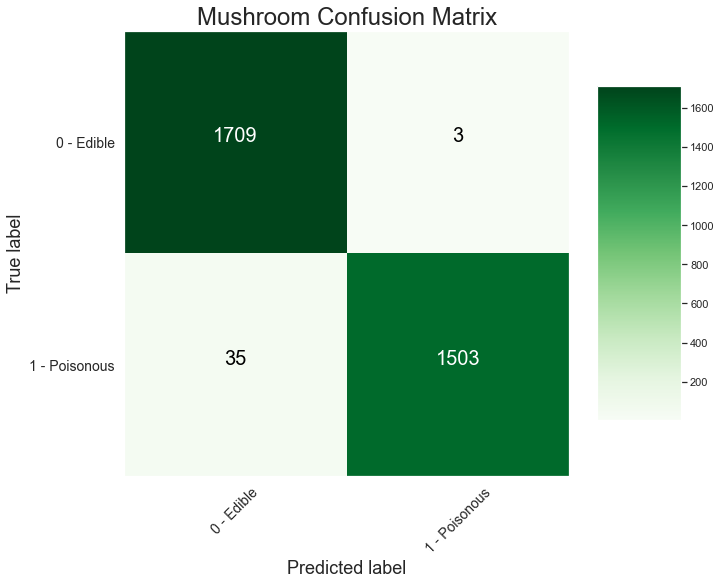

In [212]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Edible', '1 - Poisonous'],
                      title = 'Mushroom Confusion Matrix')

In [213]:
# Feature Importance
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[5.10290470e-04 0.00000000e+00 6.21788873e-04 4.49096341e-04
 6.27913483e-04 0.00000000e+00 4.95312819e-03 0.00000000e+00
 1.34554629e-03 5.14926086e-03 9.45320636e-04 1.58494624e-03
 0.00000000e+00 0.00000000e+00 1.38568747e-04 0.00000000e+00
 0.00000000e+00 1.13475690e-03 9.37817957e-04 1.98148233e-03
 2.49326520e-02 4.55327633e-02 2.29997869e-03 5.87596815e-03
 5.90933506e-03 4.96793334e-03 6.15138560e-02 0.00000000e+00
 1.19416547e-01 8.17072817e-03 3.62650286e-03 1.65120059e-05
 1.50381986e-03 2.28132695e-02 1.94845625e-02 6.38052877e-02
 8.71183460e-02 4.49601841e-05 6.39753933e-04 4.22365922e-02
 6.82322507e-04 0.00000000e+00 3.57716177e-04 0.00000000e+00
 5.90422514e-05 2.57514205e-04 0.00000000e+00 8.74043579e-04
 0.00000000e+00 1.09183698e-02 1.12848807e-02 1.54377196e-02
 7.16219460e-03 1.33281863e-02 1.03399995e-02 2.19641817e-03
 3.55762294e-03 0.00000000e+00 5.57010386e-02 2.16731755e-02
 2.47619734e-03 7.41586616e-04 3.60324682e-02 1.31961973e-02
 1.88964277e-05 1.227329

In [214]:
# Feature Importance
X_train_encoded = encode_and_bind(X_train, features_to_encode)

feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: odor_none                           Importance: 0.11941654664058336
Feature: gill-size_narrow                    Importance: 0.0871183459774256
Feature: gill-size_broad                     Importance: 0.0638052876987394
Feature: odor_foul                           Importance: 0.06151385599957515
Feature: stalk-surface-above-ring_silky      Importance: 0.05570103857771014
Feature: bruises_no bruises                  Importance: 0.045532763305984665
Feature: gill-color_buff                     Importance: 0.0422365922193013
Feature: cluster                             Importance: 0.0406236148154447
Feature: spore-print-color_chocolate         Importance: 0.037314123764421184
Feature: stalk-surface-below-ring_silky      Importance: 0.036032468186918944
Feature: ring-type_pendant                   Importance: 0.03472091697379022
Feature: bruises_have bruises                Importance: 0.02493265199892701
Feature: gill-spacing_close                  Importance: 0.022813269499322317

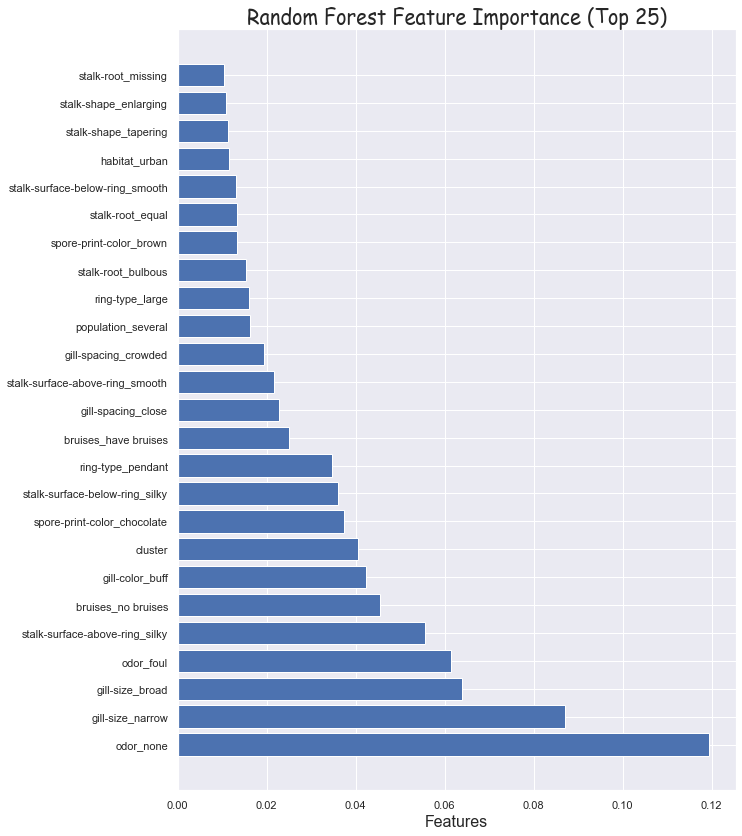

In [215]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [216]:
#Tune the hyperparameters with RandomSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}

In [217]:
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)
# Create random search model and fit the data
rf_random = RandomizedSearchCV(
                        estimator = rf,
                        param_distributions = random_grid,
                        n_iter = 100, cv = 3,
                        verbose=2, random_state=seed, 
                        scoring='roc_auc')
rf_random.fit(X_train_encoded, y_train)
rf_random.best_params_
rf_random.best_params_
{'n_estimators': 206,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 44,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=467; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=467; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, max

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=2, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=2, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, 

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=log2, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=638; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=log2, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=638; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=log2, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=638; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=log2, max_leaf_nodes=29, min_samples_leaf=1, min_samples_split=10, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, max_leaf_nodes=29, min_samples_leaf=1, min_samples_split=10, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, max_leaf_nodes=29, min_samples_leaf=1, min_samples_split=10, n_estimators=393; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=381; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=381; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=381; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=10, min_samples_split=10, n_estimators=491; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=10, min_samples_split=10, n_estimators=491; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=10, min_samples_split=10, n_estimators=491; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=18, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=auto, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=10, n_estimators=112; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=70, max_features=auto, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=10, n_estimators=112; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=10, n_estimators=112; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=2, n_estimators=112; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=2, n_estimators=112; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=37, min_samples_leaf=4, min_samples_split=2, n_estimators=112; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=21, min_samples_leaf=4, min_samples_split=5, n_estimators=295; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=21, min_samples_leaf=4, min_samples_split=5, n_estimators=295; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=21, min_samples_leaf=4, min_samples_split=5, n_estimators=295; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=418; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=418; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=418; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=2, n_estimators=197; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=2, n_estimators=197; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, max_le

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.4s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.4s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, 

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   1.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=13, min_samples_leaf=4, min_samples_split=2, n_estimators=393; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=13, min_samples_leaf=4, min_samples_split=2, n_estimators=393; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=13, min_samples_leaf=4, min_samples_split=2, n_estimators=393; total time=   0.5s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=5, n_estimators=283; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=5, n_estimators=283; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=15, min_samples_leaf=4, min_samples_split=5, n_estimators=283; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=5, n_estimators=332; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, max_leaf_nodes=13, min_samples_leaf=10, min_samples_split=5, n_estimators=332; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=136; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=136; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.4s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.4s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   0.9s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=24, min_samples_leaf=4, min_samples_split=5, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=24, min_samples_leaf=4, min_samples_split=5, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=24, min_samples_leaf=4, min_samples_split=5, n_estimators=589; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.4s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.4s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.5s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   0.8s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=10, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=10, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, m

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.6s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=271; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=271; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=271; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=1, min_samples_split=2, n_estimators=614; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=1, min_samples_split=2, n_estimators=614; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=1, min_samples_split=2, n_estimators=614; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=log2, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=10, n_estimators=136; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=10, n_estimators=136; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=10, n_estimators=136; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=12, min_samples_leaf=10, min_samples_split=5, n_estimators=185; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=12, min_samples_leaf=10, min_samples_split=5, n_estimators=185; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, m

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=34, min_samples_leaf=4, min_samples_split=10, n_estimators=479; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=34, min_samples_leaf=4, min_samples_split=10, n_estimators=479; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=479; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=479; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=5, n_estimators=479; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.7s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.3s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=15, min_samples_leaf=10, min_samples_split=2, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=15, min_samples_leaf=10, min_samples_split=2, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=15, min_samples_leaf=10, min_samples_split=2, n_estimators=602; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.1s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=2, n_estimators=332; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=2, n_estimators=332; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_l

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.2s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   0.9s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   0.8s


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eskim\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:

{'n_estimators': 206,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 44,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [218]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf_random = RandomizedSearchCV(
                estimator = rf,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1, random_state=seed,
                scoring='roc_auc')
pipe_random = make_pipeline(col_trans, rf_random)
pipe_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eskim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

{'n_estimators': 161,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 44,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [219]:
#Evaluate the best model
best_model = rf_random.best_estimator_
pipe_best_model = make_pipeline(col_trans, best_model)
pipe_best_model.fit(X_train, y_train)
y_pred_best_model = pipe_best_model.predict(X_test)

C:\Users\eskim\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [220]:
n_nodes = []
max_depths = []
for ind_tree in best_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')  

Average number of nodes 78
Average maximum depth 14


Baseline: 1.0 
 Test: 1.0 
 Train: 1.0
Baseline: 0.47 
 Test: 1.0 
 Train: 1.0
Baseline: 0.5 
 Test: 1.0 
 Train: 1.0


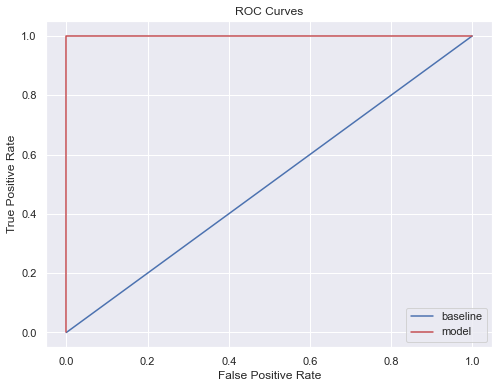

In [221]:
#plot the ROC curve
train_rf_predictions = pipe_best_model.predict(X_train)
train_rf_probs = pipe_best_model.predict_proba(X_train)[:, 1]
rf_probs = pipe_best_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_model, rf_probs, train_rf_predictions, train_rf_probs)

C:\Users\eskim\AppData\Local\Temp\ipykernel_1768\2233886449.py:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


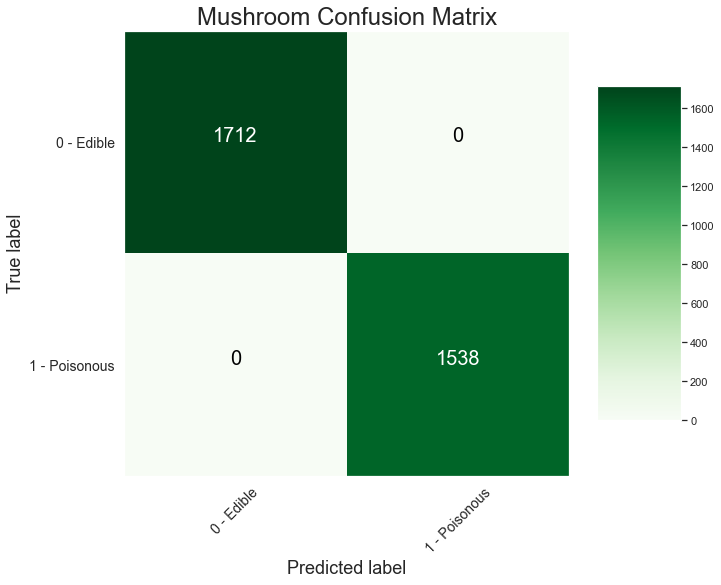

In [222]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_model), classes = ['0 - Edible', '1 - Poisonous'],
title = 'Mushroom Confusion Matrix')

## Decision tree

In [223]:
#getting the required dataset -> converting them using OHE to numerical form
mushroom_cat = dataset[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]
ohe.fit(mushroom_cat)
mushroom_cat_ohe = pd.DataFrame(ohe.transform(mushroom_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(mushroom_cat.columns))

In [224]:
mushroom_res = dataset['class']
mushroom_ohe = pd.concat([mushroom_cat_ohe, mushroom_res], 
                           sort = False, axis = 1)

Estimating at every Depth

Depth 1

[Text(0.5, 0.75, 'odor_none <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2935, 2751]\nclass = Eatable'),
 Text(0.25, 0.25, 'gini = 0.287\nsamples = 3224\nvalue = [560, 2664]\nclass = Poisonous'),
 Text(0.75, 0.25, 'gini = 0.068\nsamples = 2462\nvalue = [2375, 87]\nclass = Eatable')]

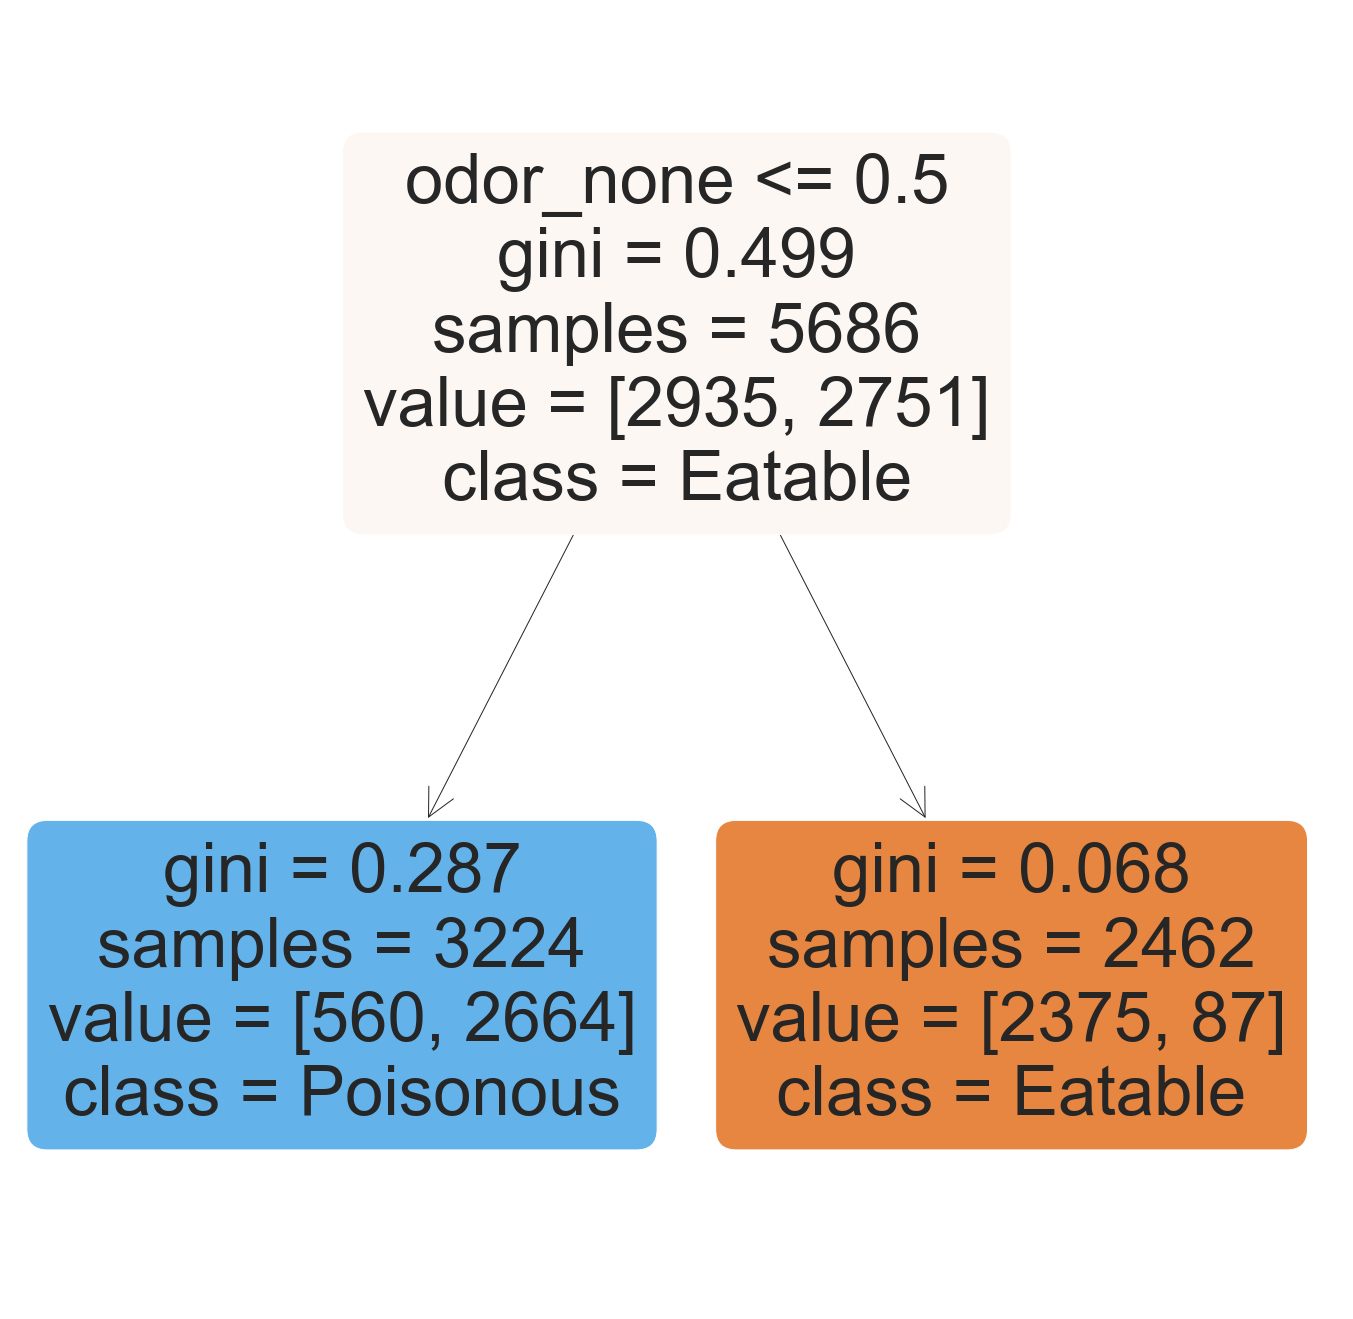

In [225]:
#depth 1
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 1)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.8862117481533591

TPR Train :	 0.9683751363140676
TNR Train :	 0.8091993185689949

FPR Train :	 0.19080068143100512
FNR Train :	 0.03162486368593239


<AxesSubplot:>

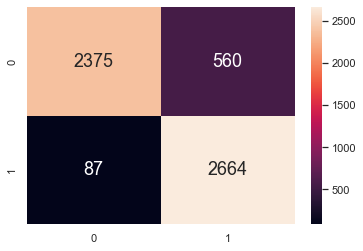

In [226]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8880229696472518

TPR Test :	 0.9716738197424892
TNR Test :	 0.8114689709347996

FPR Test :	 0.1885310290652003
FNR Test :	 0.02832618025751073


<AxesSubplot:>

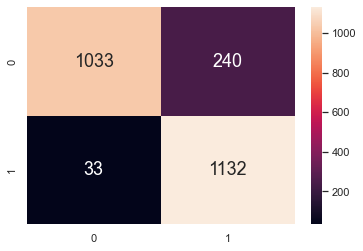

In [227]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 2

[Text(0.5, 0.8333333333333334, 'odor_none <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2982, 2704]\nclass = Eatable'),
 Text(0.25, 0.5, 'stalk-root_club <= 0.5\ngini = 0.295\nsamples = 3198\nvalue = [576, 2622]\nclass = Poisonous'),
 Text(0.125, 0.16666666666666666, 'gini = 0.14\nsamples = 2807\nvalue = [212, 2595]\nclass = Poisonous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.129\nsamples = 391\nvalue = [364, 27]\nclass = Eatable'),
 Text(0.75, 0.5, 'spore-print-color_green <= 0.5\ngini = 0.064\nsamples = 2488\nvalue = [2406, 82]\nclass = Eatable'),
 Text(0.625, 0.16666666666666666, 'gini = 0.027\nsamples = 2440\nvalue = [2406, 34]\nclass = Eatable'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]\nclass = Poisonous')]

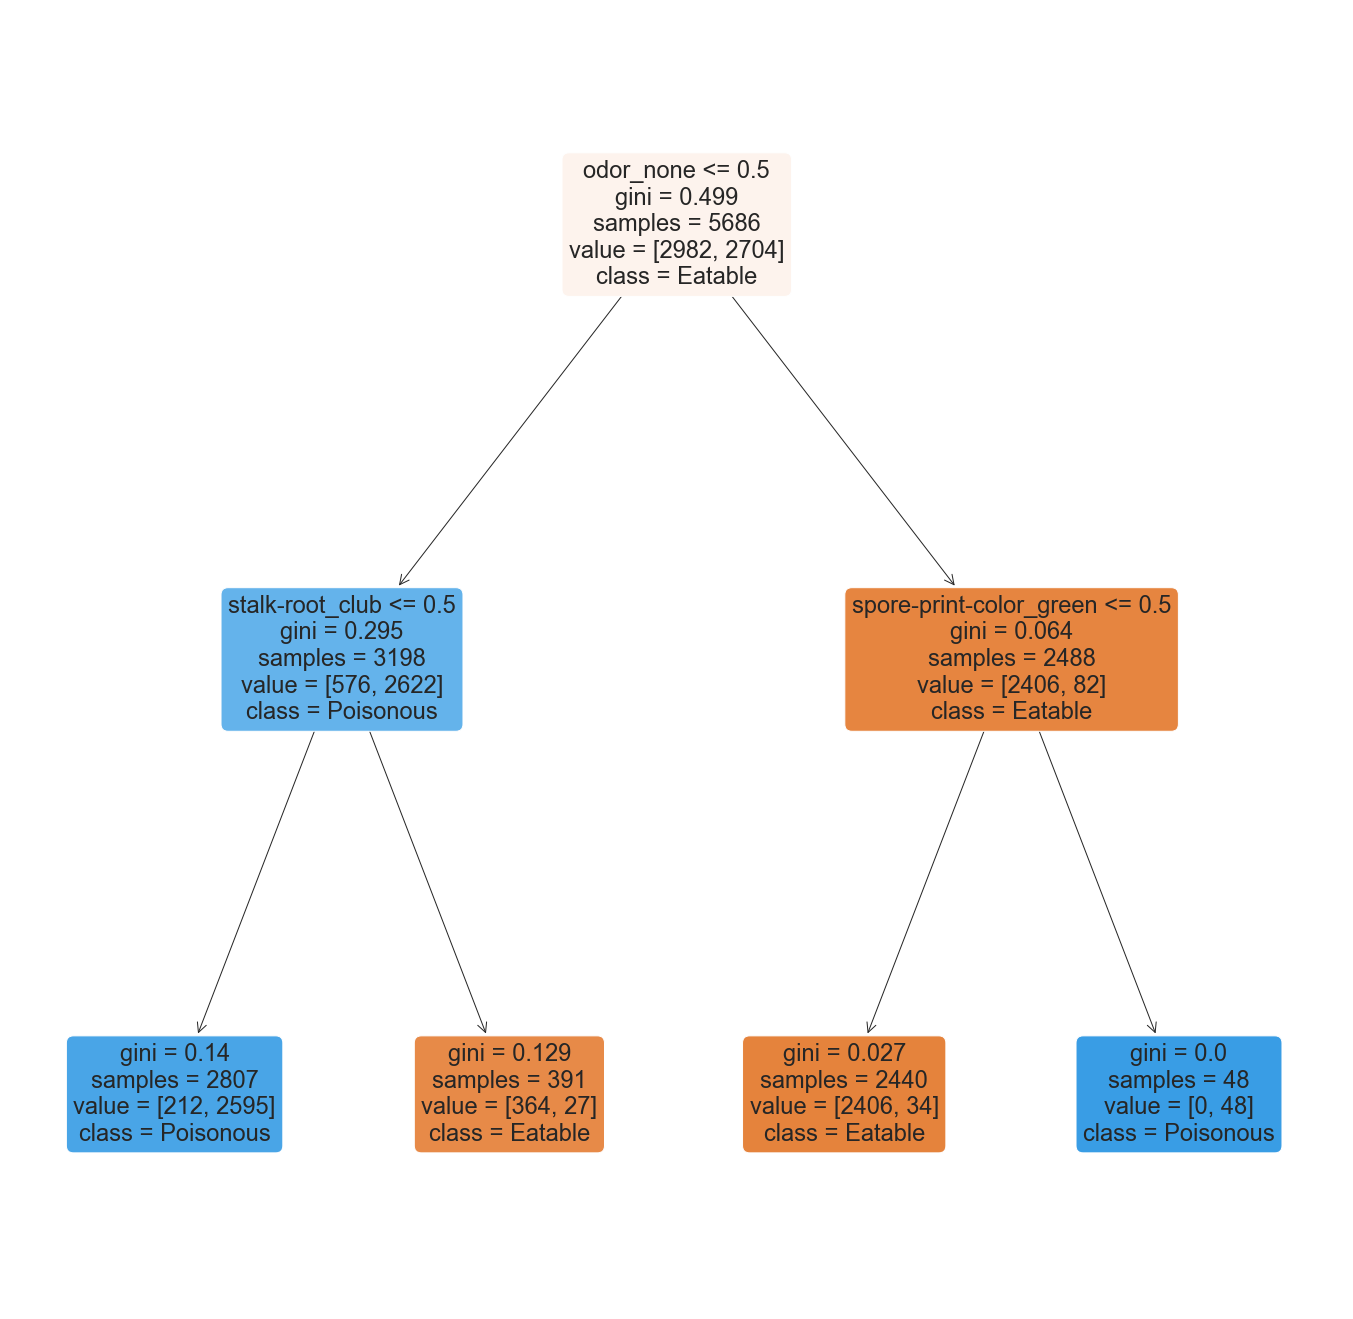

In [228]:
#depth 2
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 2)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9519873373197327

TPR Train :	 0.9774408284023669
TNR Train :	 0.9289067739771966

FPR Train :	 0.07109322602280349
FNR Train :	 0.022559171597633137


<AxesSubplot:>

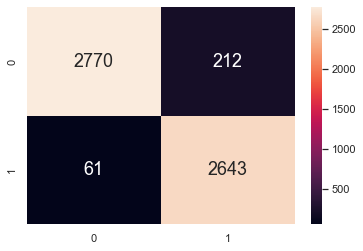

In [230]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9593929450369155

TPR Test :	 0.981023102310231
TNR Test :	 0.9380097879282219

FPR Test :	 0.06199021207177814
FNR Test :	 0.018976897689768978


<AxesSubplot:>

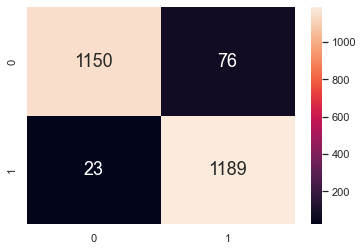

In [231]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 3

[Text(0.5769230769230769, 0.875, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2899, 2787]\nclass = Eatable'),
 Text(0.3076923076923077, 0.625, 'stalk-root_club <= 0.5\ngini = 0.281\nsamples = 3250\nvalue = [549, 2701]\nclass = Poisonous'),
 Text(0.15384615384615385, 0.375, 'stalk-root_rooted <= 0.5\ngini = 0.128\nsamples = 2872\nvalue = [197, 2675]\nclass = Poisonous'),
 Text(0.07692307692307693, 0.125, 'gini = 0.047\nsamples = 2741\nvalue = [66, 2675]\nclass = Poisonous'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]\nclass = Eatable'),
 Text(0.46153846153846156, 0.375, 'ring-number_null <= 0.5\ngini = 0.128\nsamples = 378\nvalue = [352, 26]\nclass = Eatable'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 352\nvalue = [352, 0]\nclass = Eatable'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = Poisonous'),
 Text(0.8461538461538461, 0.625, 'spore-print-color_green <= 0.5\ngini = 0.068\nsamples

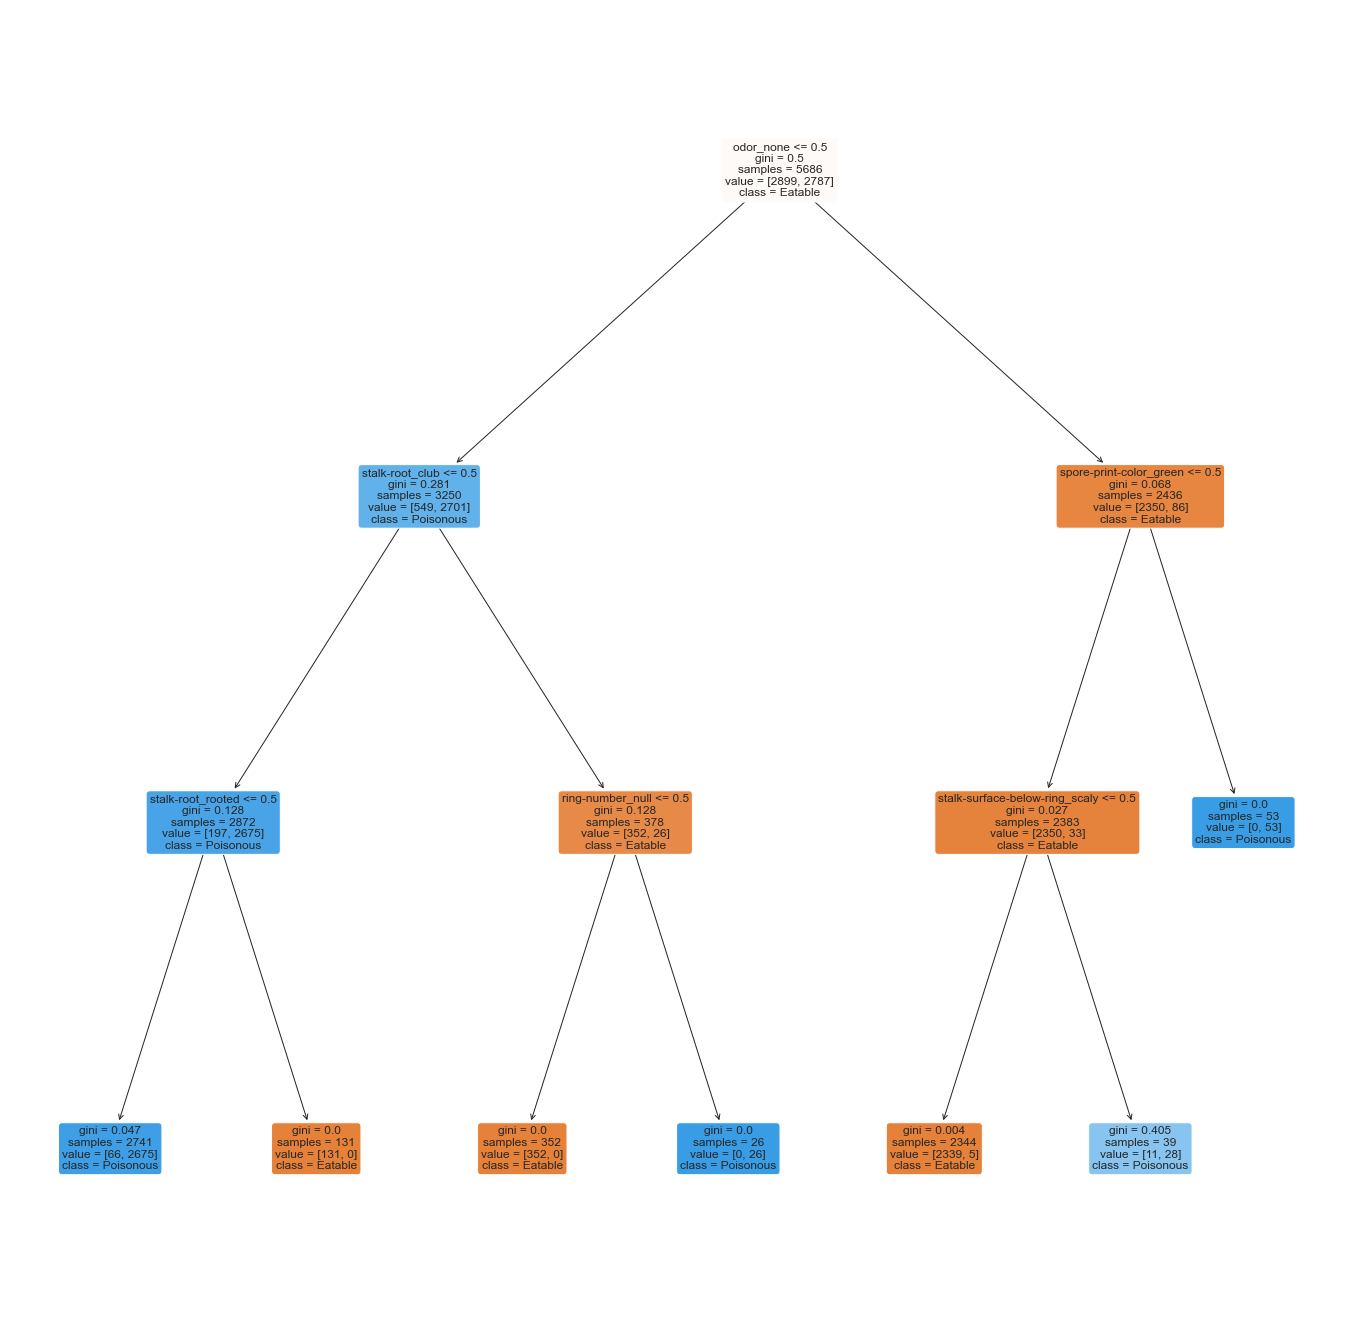

In [232]:
#depth 3
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9855786141399929

TPR Train :	 0.9982059562253319
TNR Train :	 0.9734391169368748

FPR Train :	 0.026560883063125217
FNR Train :	 0.001794043774668102


<AxesSubplot:>

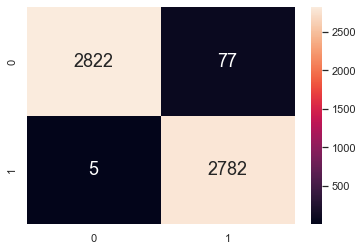

In [233]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9844134536505332

TPR Test :	 0.9973427812223207
TNR Test :	 0.9732620320855615

FPR Test :	 0.026737967914438502
FNR Test :	 0.002657218777679362


<AxesSubplot:>

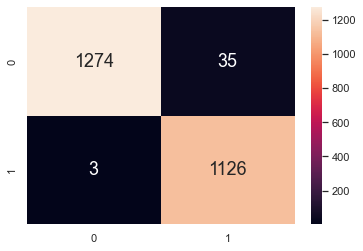

In [234]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 4

[Text(0.5625, 0.9, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2932, 2754]\nclass = Eatable'),
 Text(0.3125, 0.7, 'stalk-root_club <= 0.5\ngini = 0.28\nsamples = 3215\nvalue = [541, 2674]\nclass = Poisonous'),
 Text(0.1875, 0.5, 'stalk-root_rooted <= 0.5\ngini = 0.131\nsamples = 2849\nvalue = [201, 2648]\nclass = Poisonous'),
 Text(0.125, 0.3, 'odor_anise <= 0.5\ngini = 0.05\nsamples = 2717\nvalue = [69, 2648]\nclass = Poisonous'),
 Text(0.0625, 0.1, 'gini = 0.024\nsamples = 2681\nvalue = [33, 2648]\nclass = Poisonous'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]\nclass = Eatable'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 132\nvalue = [132, 0]\nclass = Eatable'),
 Text(0.4375, 0.5, 'stalk-color-above-ring_white <= 0.5\ngini = 0.132\nsamples = 366\nvalue = [340, 26]\nclass = Eatable'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = Poisonous'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 340\nvalue = [340, 0]\nclass = Eatable'),
 Text(0.8

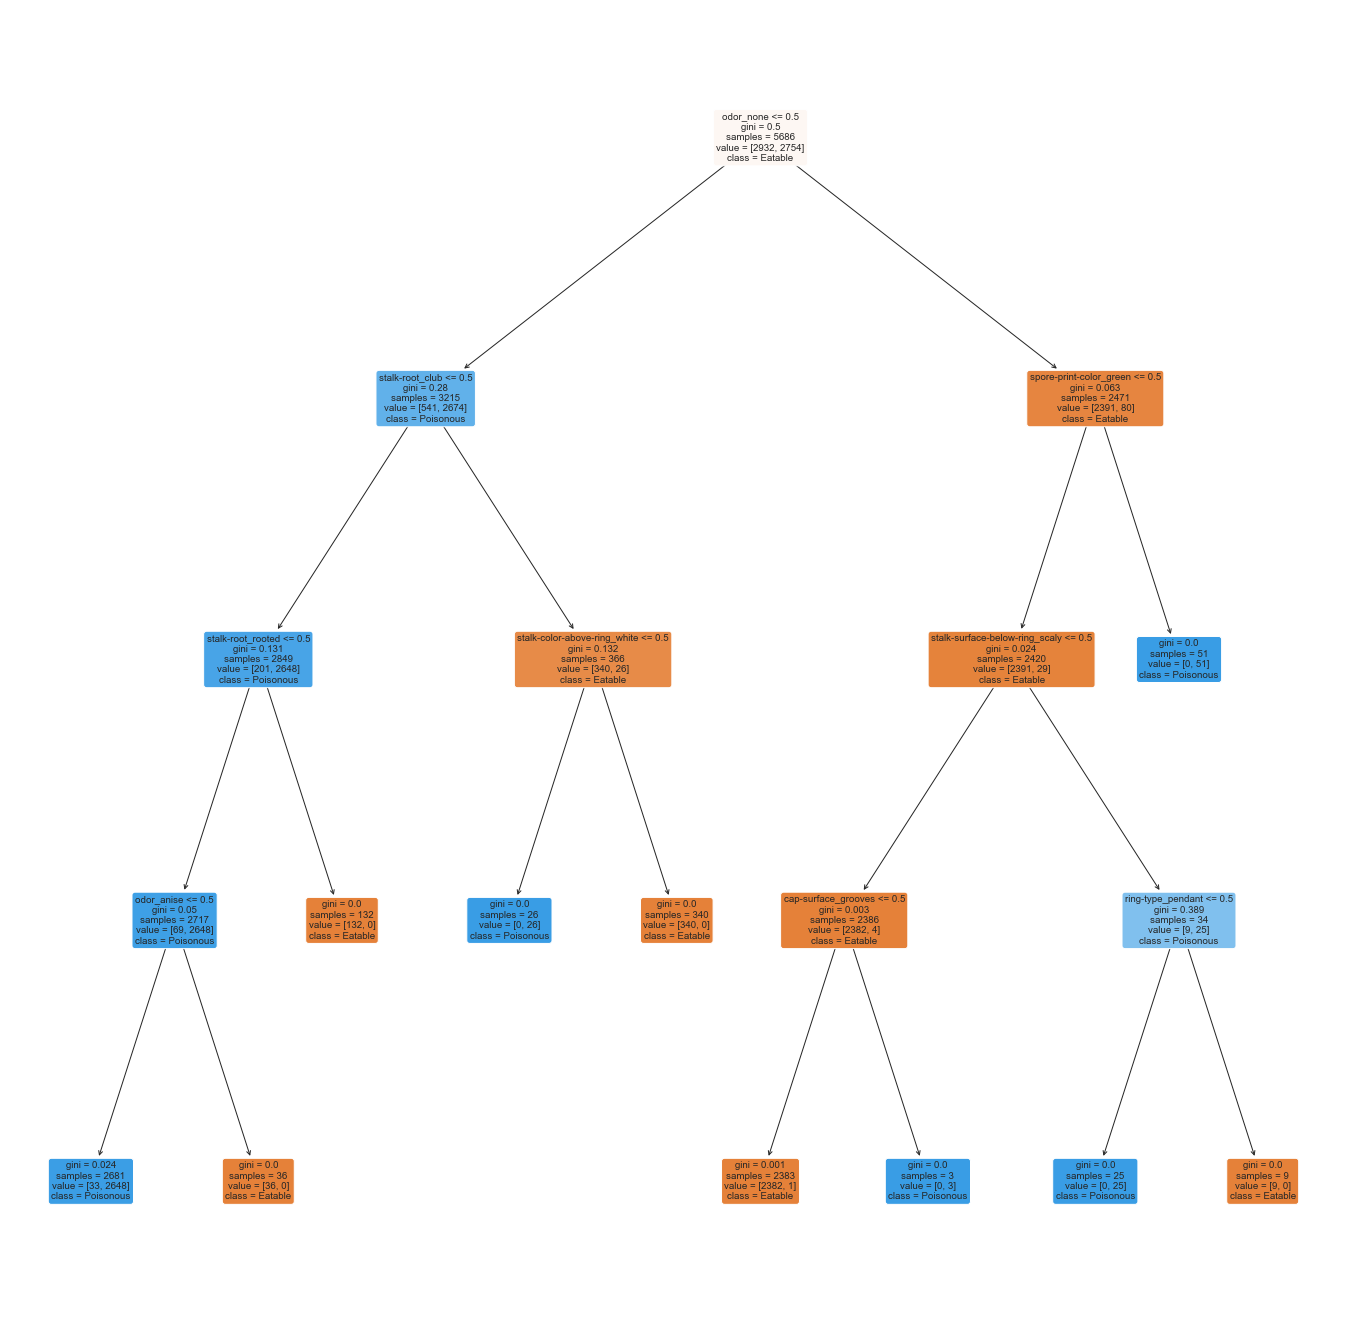

In [235]:
#depth 4
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9940204009848751

TPR Train :	 0.9996368917937546
TNR Train :	 0.9887448840381992

FPR Train :	 0.011255115961800819
FNR Train :	 0.00036310820624546115


<AxesSubplot:>

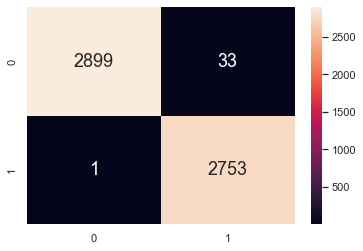

In [236]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.992616899097621

TPR Test :	 0.9974182444061962
TNR Test :	 0.9882445141065831

FPR Test :	 0.011755485893416929
FNR Test :	 0.0025817555938037868


<AxesSubplot:>

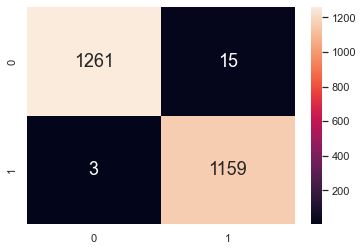

In [237]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 5

[Text(0.5882352941176471, 0.9166666666666666, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2929, 2757]\nclass = Eatable'),
 Text(0.35294117647058826, 0.75, 'stalk-root_club <= 0.5\ngini = 0.281\nsamples = 3219\nvalue = [545, 2674]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.5833333333333334, 'stalk-surface-below-ring_scaly <= 0.5\ngini = 0.126\nsamples = 2841\nvalue = [192, 2649]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.4166666666666667, 'odor_anise <= 0.5\ngini = 0.044\nsamples = 2710\nvalue = [61, 2649]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.25, 'odor_almond <= 0.5\ngini = 0.021\nsamples = 2678\nvalue = [29, 2649]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 2649\nvalue = [0, 2649]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 

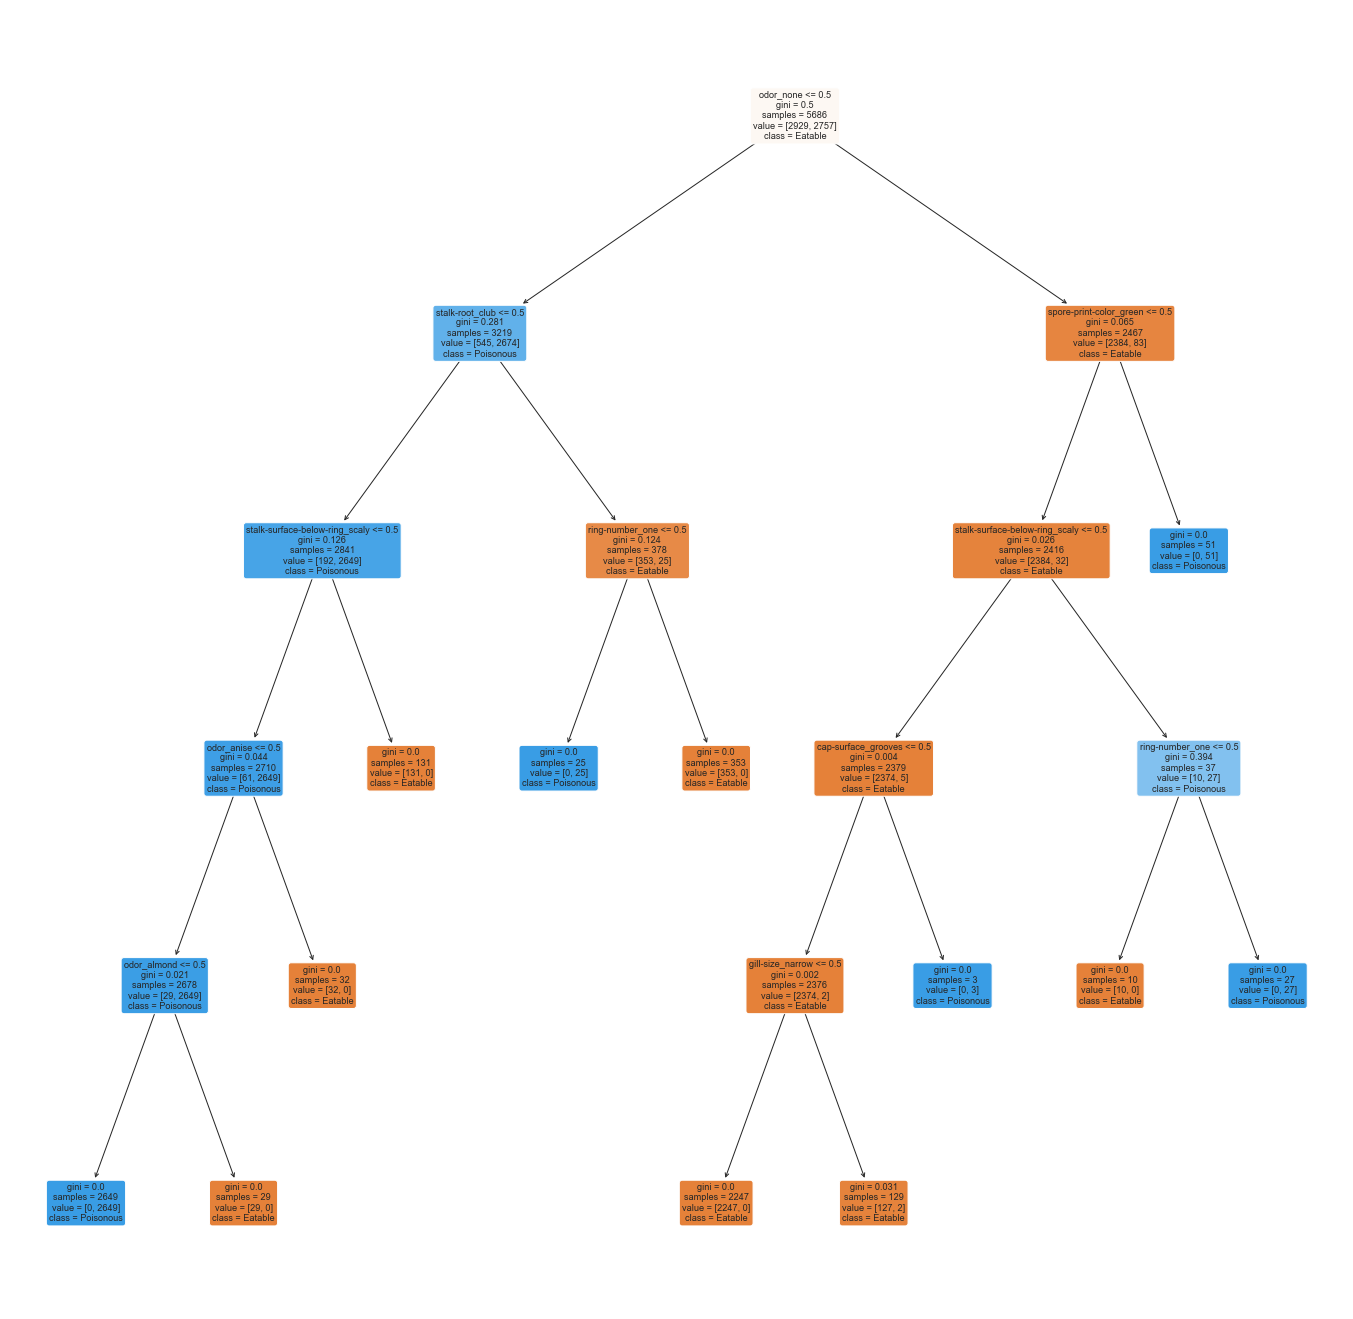

In [238]:
#depth 5
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9996482588814632

TPR Train :	 0.9992745738121146
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0007254261878853826


<AxesSubplot:>

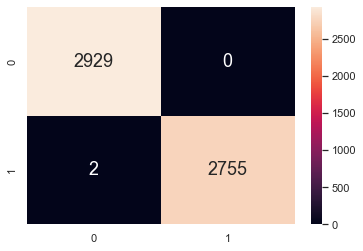

In [239]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9991796554552912

TPR Test :	 0.998274374460742
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.001725625539257981


<AxesSubplot:>

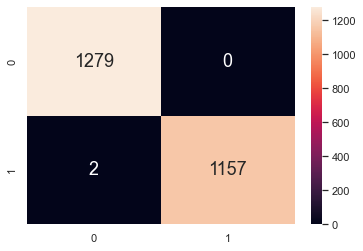

In [240]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 6

[Text(0.4583333333333333, 0.9285714285714286, 'odor_none <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2965, 2721]\nclass = Eatable'),
 Text(0.16666666666666666, 0.7857142857142857, 'bruises_have bruises <= 0.5\ngini = 0.297\nsamples = 3218\nvalue = [584, 2634]\nclass = Poisonous'),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 2267\nvalue = [0, 2267]\nclass = Poisonous'),
 Text(0.25, 0.6428571428571429, 'spore-print-color_chocolate <= 0.5\ngini = 0.474\nsamples = 951\nvalue = [584, 367]\nclass = Eatable'),
 Text(0.16666666666666666, 0.5, 'stalk-root_equal <= 0.5\ngini = 0.356\nsamples = 760\nvalue = [584, 176]\nclass = Eatable'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 584\nvalue = [584, 0]\nclass = Eatable'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 176\nvalue = [0, 176]\nclass = Poisonous'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 191\nvalue = [0, 191]\nclass = Poisonous'),
 Text(0.75, 0.78571428571

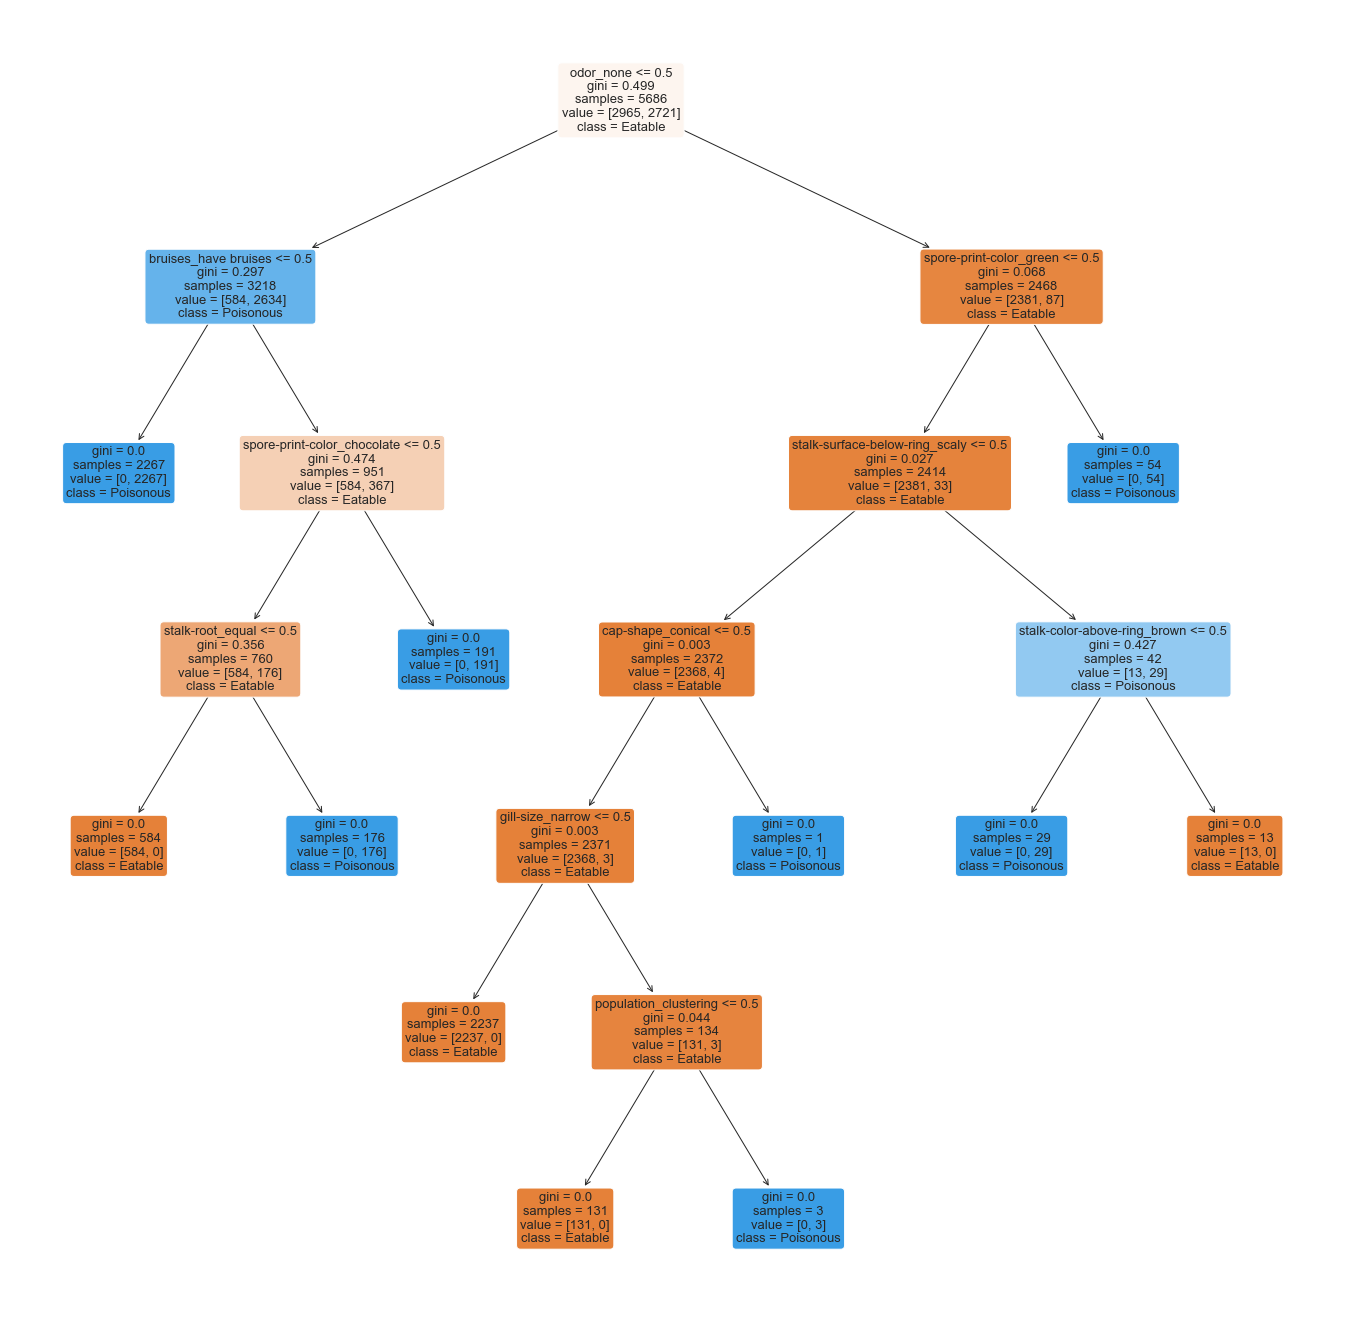

In [241]:
#depth 6
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 6)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

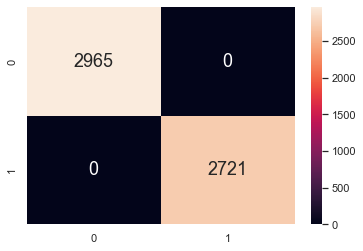

In [242]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

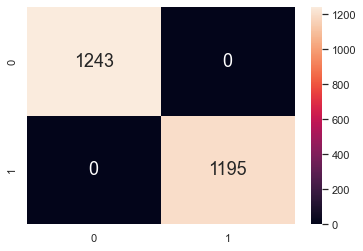

In [243]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 7

[Text(0.5882352941176471, 0.9285714285714286, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2894, 2792]\nclass = Eatable'),
 Text(0.35294117647058826, 0.7857142857142857, 'stalk-root_club <= 0.5\ngini = 0.29\nsamples = 3290\nvalue = [578, 2712]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6428571428571429, 'stalk-surface-below-ring_scaly <= 0.5\ngini = 0.134\nsamples = 2897\nvalue = [210, 2687]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5, 'odor_anise <= 0.5\ngini = 0.049\nsamples = 2756\nvalue = [69, 2687]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.35714285714285715, 'odor_almond <= 0.5\ngini = 0.023\nsamples = 2719\nvalue = [32, 2687]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 2687\nvalue = [0, 2687]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 3

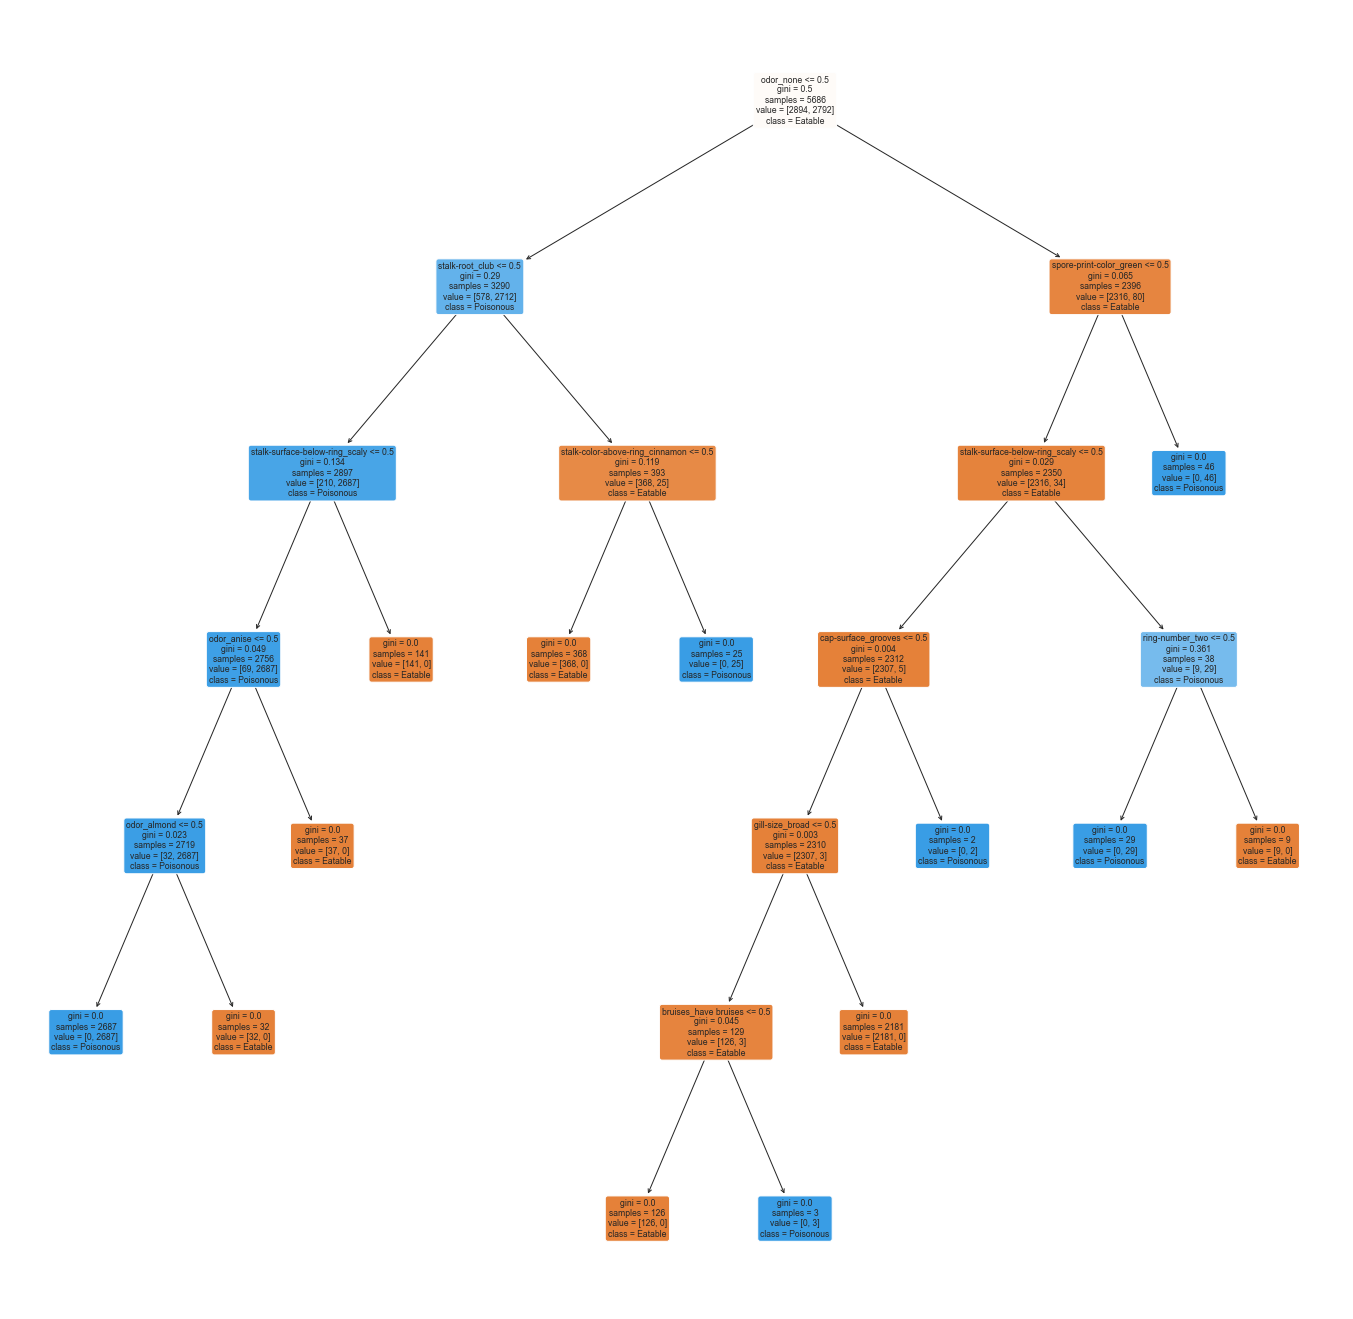

In [244]:
#depth 7
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 7)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

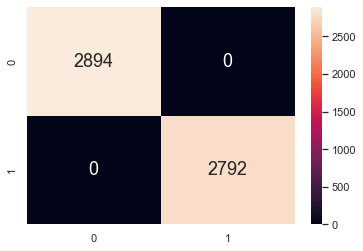

In [245]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

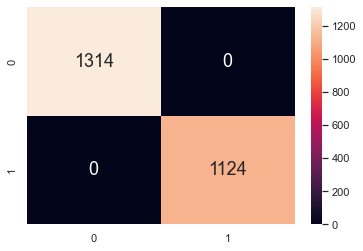

In [246]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Depth 8

[Text(0.5882352941176471, 0.9375, 'odor_none <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2948, 2738]\nclass = Eatable'),
 Text(0.35294117647058826, 0.8125, 'stalk-root_club <= 0.5\ngini = 0.286\nsamples = 3203\nvalue = [554, 2649]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6875, 'stalk-surface-below-ring_scaly <= 0.5\ngini = 0.124\nsamples = 2813\nvalue = [187, 2626]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5625, 'odor_almond <= 0.5\ngini = 0.047\nsamples = 2691\nvalue = [65, 2626]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.4375, 'odor_anise <= 0.5\ngini = 0.021\nsamples = 2654\nvalue = [28, 2626]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2626\nvalue = [0, 2626]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = Eatable'),
 Text(0.29411764705882354, 0.5625, 'gini = 

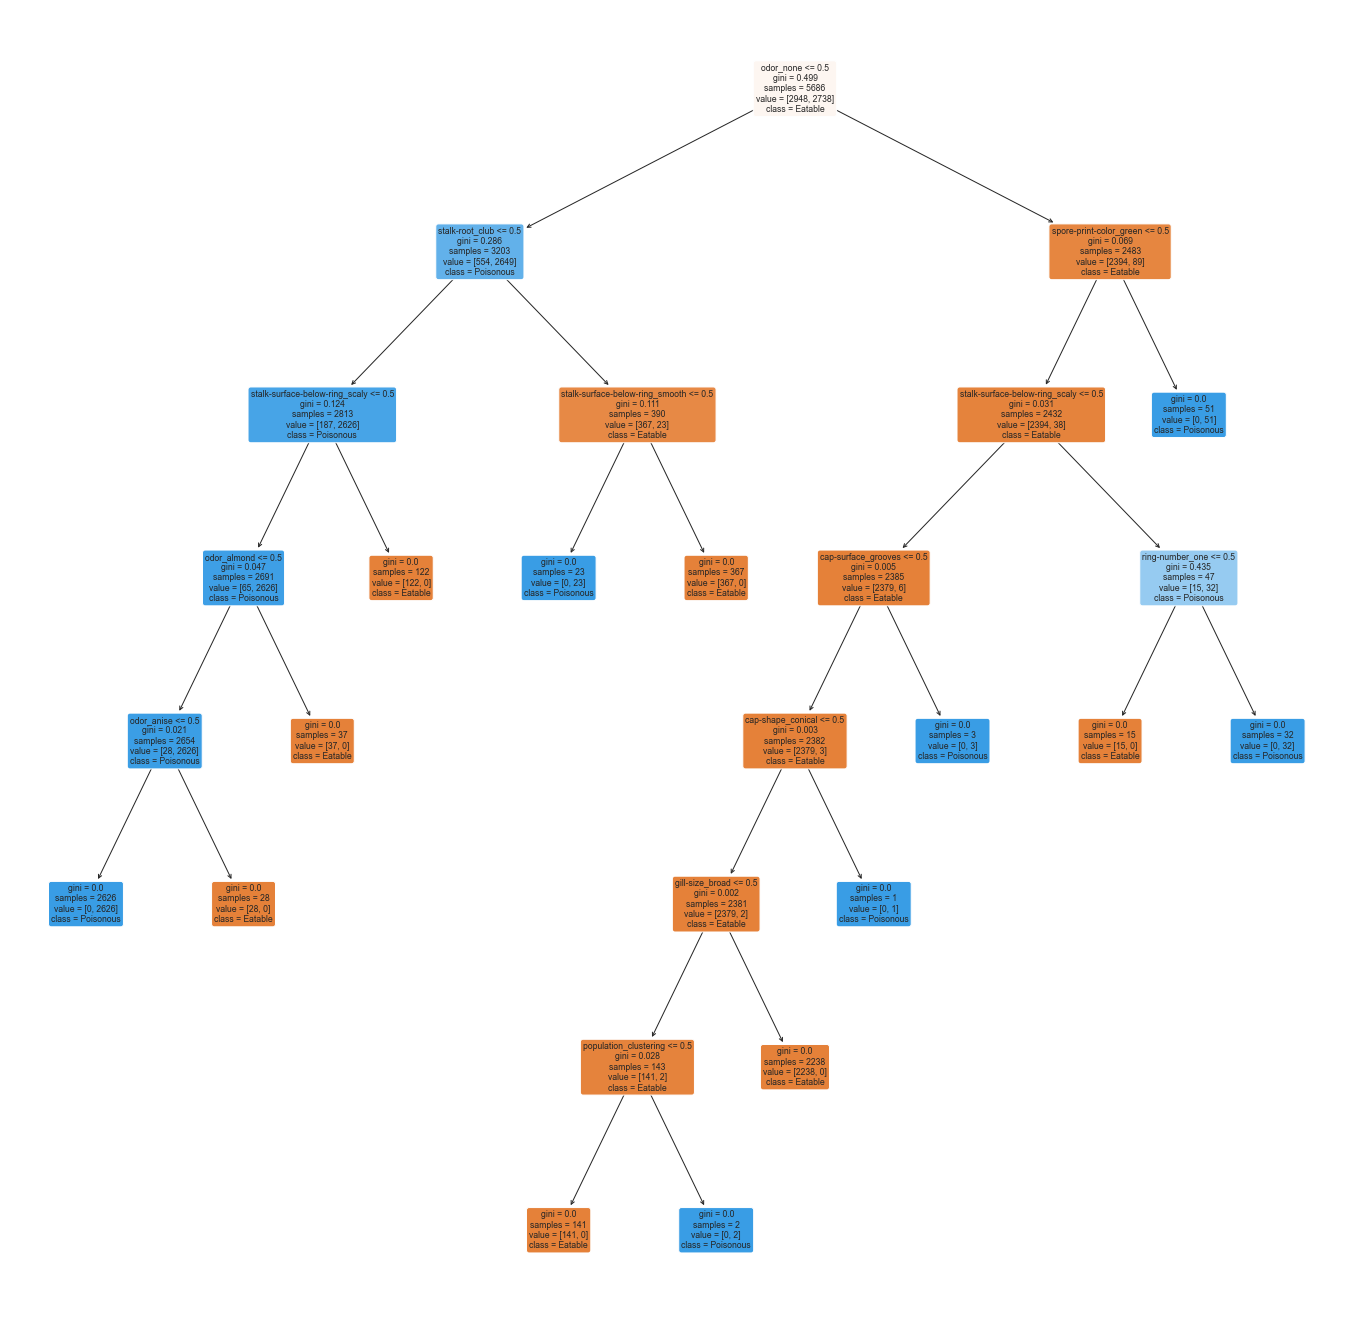

In [247]:
#depth 8
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 8)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

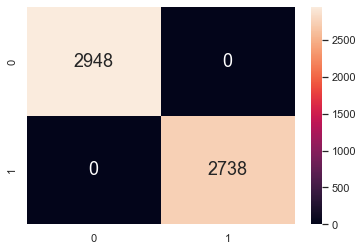

In [248]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

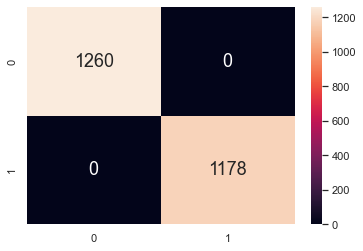

In [249]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

User input

In [260]:
def laberEncoder(X):    
    # create label encoder object
    le = LabelEncoder()

    # encode categorical variables
    X['cap-shape'] = le.fit_transform(X['cap-shape'])
    X['bbcap-surface'] = le.fit_transform(X['cap-surface'])
    X['cap-color'] = le.fit_transform(X['cap-color'])
    X['bruises'] = le.fit_transform(X['bruises'])
    X['odor'] = le.fit_transform(X['odor'])
    X['gill-attachment'] = le.fit_transform(X['gill-attachment'])
    X['gill-spacing'] = le.fit_transform(X['gill-spacing'])
    X['gill-size'] = le.fit_transform(X['gill-size'])
    X['gill-color'] = le.fit_transform(X['gill-color'])
    X['stalk-shape'] = le.fit_transform(X['stalk-shape'])
    X['stalk-root'] = le.fit_transform(X['stalk-root'])
    X['stalk-surface-above-ring'] = le.fit_transform(X['stalk-surface-above-ring'])
    X['stalk-surface-below-ring'] = le.fit_transform(X['stalk-surface-below-ring'])
    X['stalk-color-above-ring'] = le.fit_transform(X['stalk-color-above-ring'])
    X['stalk-color-below-ring'] = le.fit_transform(X['stalk-color-below-ring'])
    X['veil-type'] = le.fit_transform(X['veil-type'])
    X['veil-color'] = le.fit_transform(X['veil-color'])
    X['ring-number'] = le.fit_transform(X['ring-number'])
    X['ring-type'] = le.fit_transform(X['ring-type'])
    X['spore-print-color'] = le.fit_transform(X['spore-print-color'])
    X['population'] = le.fit_transform(X['population'])
    X['habitat'] = le.fit_transform(X['habitat'])


In [261]:
label_encoders = {}

new_dataset = pd.DataFrame(columns=dataset.columns)

for col in dataset.columns:
    label_encoder = LabelEncoder()
    new_dataset[col] = label_encoder.fit_transform(dataset[col])
    label_encoders[col] = label_encoder  # will be used later in prediction
    print(col, new_dataset[col].unique(), label_encoder.classes_)

print(label_encoders)

class [1 0] [0 1]
cap-shape [2 0 5 3 4 1] ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken']
cap-surface [3 2 0 1] ['fibrous' 'grooves' 'scaly' 'smooth']
cap-color [0 9 8 4 7 5 1 6 2 3] ['brown' 'buff' 'cinnamon' 'green' 'grey' 'pink' 'purple' 'red' 'white'
 'yellow']
bruises [0 1] ['have bruises' 'no bruises']
odor [7 0 1 6 4 2 3 8 5] ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy']
gill-attachment [1 0] ['attached' 'free']
gill-spacing [0 1] ['close' 'crowded']
gill-size [1 0] ['broad' 'narrow']
gill-color [ 0  1  5  7 10  3  8  9  2  4 11  6] ['black' 'brown' 'buff' 'chocolate' 'green' 'grey' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow']
stalk-shape [0 1] ['enlarging' 'tapering']
stalk-root [2 1 0 4 3] ['bulbous' 'club' 'equal' 'missing' 'rooted']
stalk-surface-above-ring [3 0 2 1] ['fibrous' 'scaly' 'silky' 'smooth']
stalk-surface-below-ring [3 0 1 2] ['fibrous' 'scaly' 'silky' 'smooth']
stalk-color-above-ring [7 3 5 0 1 6 4 2 8] ['brown' 'buff'

In [262]:
X = new_dataset.drop('class', axis=1)
y = new_dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [264]:
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [265]:
#manual input
new_mushroom = {}

# prompt user for each characteristic
new_mushroom['cap-shape'] = input('Enter the cap shape of the mushroom (bell,conical,convex,flat, knobbed,sunken): ')
new_mushroom['cap-surface'] = input('Enter the cap surface of the mushroom (fibrous,grooves,scaly,smooth): ')
new_mushroom['cap-color'] = input('Enter the cap color of the mushroom (brown,buff,cinnamon,gray,green,pink,purple,red,white,yellow): ')
new_mushroom['bruises'] = input('Does the mushroom have bruises? (have bruises/no bruises): ')
new_mushroom['odor'] = input('Enter the odor of the mushroom (almond,anise,creosote,fishy,foul,musty,none,pungent,spicy): ')
new_mushroom['gill-attachment'] = input('Enter the gill attachment of the mushroom (attached,descending,free,notched): ')
new_mushroom['gill-spacing'] = input('Enter the gill spacing of the mushroom (close,crowded,distant): ')
new_mushroom['gill-size'] = input('Enter the gill size of the mushroom (broad,narrow): ')
new_mushroom['gill-color'] = input('Enter the gill color of the mushroom (black,brown,buff,chocolate,gray, green,orange,pink,purple,red,white,yellow): ')
new_mushroom['stalk-shape'] = input('Enter the stalk shape of the mushroom (enlarging,tapering): ')
new_mushroom['stalk-root'] = input('Enter the stalk root of the mushroom (bulbous,club,cup,equal,rhizomorphs,rooted,missing): ')
new_mushroom['stalk-surface-above-ring'] = input('Enter the stalk surface above the ring of the mushroom (fibrous,scaly,silky,smooth): ')
new_mushroom['stalk-surface-below-ring'] = input('Enter the stalk surface below the ring of the mushroom (fibrous,scaly,silky,smooth): ')
new_mushroom['stalk-color-above-ring'] = input('Enter the stalk color above the ring of the mushroom (brown,buff,cinnamon,gray,orange,pink,red,white,yellow): ')
new_mushroom['stalk-color-below-ring'] = input('Enter the stalk color below the ring of the mushroom (brown,buff,cinnamon,gray,orange,pink,red,white,yellow): ')
new_mushroom['veil-type'] = input('Enter the veil type of the mushroom (partial,universal): ')
new_mushroom['veil-color'] = input('Enter the veil color of the mushroom (brown,orange,white,yellow): ')
new_mushroom['ring-number'] = input('Enter the ring number of the mushroom (none,one,two): ')
new_mushroom['ring-type'] = input('Enter the ring type of the mushroom (cobwebby,evanescent,flaring,large,none,pendant,sheathing,zone): ')
new_mushroom['spore-print-color'] = input('Enter the spore print color of the mushroom (black,brown,buff,chocolate,green,orange,purple,white,yellow): ')
new_mushroom['population'] = input('Enter the population of the mushroom (abundant,clustered,numerous,scattered,several,solitary): ')
new_mushroom['habitat'] = input('Enter the habitat of the mushroom (grasses,leaves,meadows,paths,urban,waste,woods): ')

Enter the cap shape of the mushroom (bell,conical,convex,flat, knobbed,sunken): convex
Enter the cap surface of the mushroom (fibrous,grooves,scaly,smooth): scaly
Enter the cap color of the mushroom (brown,buff,cinnamon,gray,green,pink,purple,red,white,yellow): white
Does the mushroom have bruises? (have bruises/no bruises): have bruises
Enter the odor of the mushroom (almond,anise,creosote,fishy,foul,musty,none,pungent,spicy): pungent
Enter the gill attachment of the mushroom (attached,descending,free,notched): free
Enter the gill spacing of the mushroom (close,crowded,distant): close
Enter the gill size of the mushroom (broad,narrow): narrow
Enter the gill color of the mushroom (black,brown,buff,chocolate,gray, green,orange,pink,purple,red,white,yellow): pink
Enter the stalk shape of the mushroom (enlarging,tapering): enlarging
Enter the stalk root of the mushroom (bulbous,club,cup,equal,rhizomorphs,rooted,missing): equal
Enter the stalk surface above the ring of the mushroom (fibrou

In [ ]:
#Test code -> fixed variable
'''
new_mushroom = {
'cap-shape': 'flat',
'cap-surface': 'smooth',
'cap-color': 'brown',
'bruises': 'no bruises',
'odor': 'none',
'gill-attachment': 'free',
'gill-spacing': 'close',
'gill-size': 'broad',
'gill-color': 'white',
'stalk-shape': 'tapering',
'stalk-root': 'equal',
'stalk-surface-above-ring': 'smooth',
'stalk-surface-below-ring': 'smooth',
'stalk-color-above-ring': 'brown',
'stalk-color-below-ring': 'brown',
'veil-type': 'partial',
'veil-color': 'white',
'ring-number': 'one',
'ring-type': 'pendant',
'spore-print-color': 'black',
'population': 'scattered',
'habitat': 'woods'
}

new_mushroom = {
'cap-shape': 'convex',
'cap-surface': 'scaly',
'cap-color': 'white',
'bruises': 'have bruises',
'odor': 'pungent',
'gill-attachment': 'free',
'gill-spacing': 'close',
'gill-size': 'narrow',
'gill-color': 'pink',
'stalk-shape': 'enlarging',
'stalk-root': 'equal',
'stalk-surface-above-ring': 'smooth',
'stalk-surface-below-ring': 'smooth',
'stalk-color-above-ring': 'white',
'stalk-color-below-ring': 'white',
'veil-type': 'partial',
'veil-color': 'white',
'ring-number': 'one',
'ring-type': 'pendant',
'spore-print-color': 'black',
'population': 'several',
'habitat': 'grasses'
}'''

In [266]:
new_mushroom_df = pd.DataFrame(new_mushroom, index=[0])
new_mushroom_df = new_mushroom_df.reindex(columns=X.columns, fill_value=0)  # align with training data columns


In [267]:
encoded_new_mushroom_df = pd.DataFrame(columns=new_mushroom_df.columns)
for col in new_mushroom_df.columns:
    encoded_new_mushroom_df[col] = label_encoders[col].transform(new_mushroom_df[col])


In [268]:
#print the final prediction
prediction = tree_clf.predict(encoded_new_mushroom_df)
if prediction == 0:
    print('The mushroom is edible.')
else:
    print('The mushroom is poisonous.')

The mushroom is edible.
